##Name:

Team members: Xin Sun, Zhe Zhao, Yilin Wang, Wenbin Hong

## Loading modules

In [ ]:
# Loading modules - see the help page on Canvas to see which modules you should load and how!!!
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
from scipy.stats import linregress
pd.set_option('display.max_columns', 200)
colors = sns.color_palette('colorblind')
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Loading data

In [ ]:
# loading data (filled in for you!):

# From Our World in Data
world_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', parse_dates=['date'])
us_vax = world_vax[world_vax['location']=='United States']
state_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv', parse_dates=['date'])

# From the LA Times
county_vax = pd.read_csv('https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-vaccination-county-totals.csv', parse_dates=['date'])

# From the New York Times dataset #2
us_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv', parse_dates=['date'])
state_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-states.csv', parse_dates=['date'])
county_data_2020 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2020.csv', parse_dates=["date"])
county_data_2021 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2021.csv', parse_dates=["date"])
county_data_2022 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2022.csv', parse_dates=["date"])
county_data_2023 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2023.csv', parse_dates=["date"])
county_data = pd.concat([county_data_2020, county_data_2021, county_data_2022, county_data_2023]) # making one big file for county data


In [ ]:
from google.colab import files

In [ ]:
state_data.head()

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
3,2020-01-24,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
4,2020-01-24,USA-17,Illinois,1,0.14,0.0,0,0.0,0.0


In [ ]:
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61942 entries, 0 to 61941
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 61942 non-null  datetime64[ns]
 1   geoid                61942 non-null  object        
 2   state                61942 non-null  object        
 3   cases                61942 non-null  int64         
 4   cases_avg            61942 non-null  float64       
 5   cases_avg_per_100k   61942 non-null  float64       
 6   deaths               61942 non-null  int64         
 7   deaths_avg           61942 non-null  float64       
 8   deaths_avg_per_100k  61942 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 4.3+ MB


In [ ]:
state_vax.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [ ]:
state_vax.shape

(54628, 16)

In [ ]:
world_vax.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [ ]:
world_vax.shape

(195723, 16)

In [ ]:
world_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195723 entries, 0 to 195722
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   location                             195723 non-null  object        
 1   iso_code                             195723 non-null  object        
 2   date                                 195723 non-null  datetime64[ns]
 3   total_vaccinations                   85017 non-null   float64       
 4   people_vaccinated                    80739 non-null   float64       
 5   people_fully_vaccinated              77669 non-null   float64       
 6   total_boosters                       53203 non-null   float64       
 7   daily_vaccinations_raw               70604 non-null   float64       
 8   daily_vaccinations                   194507 non-null  float64       
 9   total_vaccinations_per_hundred       85017 non-null   float64       
 

In [ ]:
state_vax_data = state_vax[['date',	'location','total_vaccinations','people_vaccinated', 'people_fully_vaccinated']]

In [ ]:
state_vax_data.head()

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2021-01-12,Alabama,78134.0,70861.0,7270.0
1,2021-01-13,Alabama,84040.0,74792.0,9245.0
2,2021-01-14,Alabama,92300.0,80480.0,NaN
3,2021-01-15,Alabama,100567.0,86956.0,13488.0
4,2021-01-16,Alabama,NaN,NaN,NaN


In [ ]:
state_vax_data.fillna(0, inplace= True)

<ipython-input-12-7e722ebdf078>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_vax_data.fillna(0, inplace= True)


In [ ]:
state_vax_data.to_csv("state_vax_data.csv", index = False)
files.download("state_vax_data.csv")

NameError: name 'files' is not defined

In [ ]:
world_vax_data = world_vax[['iso_code',	'location','date', 'total_vaccinations','people_vaccinated', 'people_fully_vaccinated']]

In [ ]:
world_vax_data.head()

,iso_code,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,AFG,Afghanistan,2021-02-22,0.0,0.0,NaN
1,AFG,Afghanistan,2021-02-23,NaN,NaN,NaN
2,AFG,Afghanistan,2021-02-24,NaN,NaN,NaN
3,AFG,Afghanistan,2021-02-25,NaN,NaN,NaN
4,AFG,Afghanistan,2021-02-26,NaN,NaN,NaN


In [ ]:
world_vax_data.fillna(0, inplace=True)

<ipython-input-30-f1efb3f2fd02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_vax_data.fillna(0, inplace=True)


In [ ]:
min_date = world_vax_data['date'].min()

In [ ]:
min_date

Timestamp('2020-12-02 00:00:00')

In [ ]:
world_vax_data['date'].max()

Timestamp('2024-07-13 00:00:00')

In [ ]:
world_vax_data.to_csv("world_vax_data.csv", index = False)
files.download("world_vax_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data to be used and join



In [ ]:
# CDC dataset #1
cdc_covid_data = pd.read_json('https://data.cdc.gov/resource/5jp2-pgaw.json?$limit=249955')

In [ ]:
# whole world dataset #3
owid_covid_data_whole_world = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

<ipython-input-14-c43027847b9b>:2: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  owid_covid_data_whole_world = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')


In [ ]:
# dataset #4
cdc_vaccine_county_level = pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$limit=249955")

# EDA

# Dataset #1

In [ ]:
cdc_covid_data.head()

,provider_location_guid,loc_store_no,loc_phone,loc_name,loc_admin_street1,loc_admin_street2,loc_admin_city,loc_admin_state,loc_admin_zip,sunday_hours,monday_hours,tuesday_hours,wednesday_hours,thursday_hours,friday_hours,saturday_hours,web_address,pre_screen,insurance_accepted,walkins_accepted,provider_notes,ndc,med_name,in_stock,supply_level,quantity_last_updated,latitude,longitude,category,offers_free_masks,bridge_access_program,min_age_months,min_age_years
0,7dca1ba8-8f67-4016-be85-c08dd997efe2,21230,470-520-7008,Walgreens Co. #21230,860 JOHNSON FERRY RD,STE 230,SANDY SPRINGS,GA,30342-1453,24H,8:00 AM - 7:00 PM,8:00 AM - 7:00 PM,8:00 AM - 7:00 PM,8:00 AM - 7:00 PM,8:00 AM - 7:00 PM,12:00 PM - 4:00 PM,https://www.walgreens.com,https://www.walgreens.com/findcare/vaccination...,1.0,1.0,Appointments are not required to receive a Cov...,59267-4331-01,"Pfizer-BioNTech, COVID-19 Vaccine, 10mcg/0.3 m...",False,0,2023-09-22,33.907625,-84.359093,covid,False,TRUE,NaN,NaN
1,a85438f2-62f0-4afc-8c9f-ab696f75ee57,18036,(636) 207-3403,"CVS Pharmacy, Inc. #18036",2511 KEHRS MILL RD.,NaN,CHESTERFIELD,MO,63017,11:00 AM - 5:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,10:00 AM - 6:00 PM,https://www.cvs.com/store-locator/details-dire...,https://www.cvs.com/immunizations/covid-19-vac...,1.0,1.0,It is highly recommended to make an appointmen...,59267-4315-01,"Pfizer-BioNTech, COVID-19 Vaccine, 3mcg/0.3 mL...",False,0,2023-09-17,38.620671,-90.581958,covid,False,TRUE,0.0,7.0
2,73bfc9a0-7190-4d03-8933-0f54a814a6af,Not applicable,(605) 345-4141,SANFORD WEBSTER CLINIC,101 Peabody Dr,NaN,Webster,SD,57274,Closed,9:00 AM - 4:00 PM,9:00 AM - 4:00 PM,9:00 AM - 4:00 PM,9:00 AM - 4:00 PM,9:00 AM - 4:00 PM,Closed,NaN,NaN,1.0,1.0,NaN,00069-2392-01,"Pfizer-BioNTech, COMIRNATY, 30mcg/0.3 mL, syringe",True,-1,2023-10-17,45.339952,-97.522621,covid,False,NaN,NaN,NaN
3,2b872ccc-bb49-4f91-9fe1-2e271aa426fc,16250,417-831-0001,Walgreens Co. #16250,440 E TAMPA ST,-,SPRINGFIELD,MO,65806-1131,24H,7:00 AM - 7:00 PM,7:00 AM - 7:00 PM,7:00 AM - 7:00 PM,7:00 AM - 7:00 PM,7:00 AM - 7:00 PM,8:00 AM - 4:00 PM,https://www.walgreens.com,https://www.walgreens.com/findcare/vaccination...,1.0,1.0,Appointments are not required to receive a Cov...,59267-4315-01,"Pfizer-BioNTech, COVID-19 Vaccine, 3mcg/0.3 mL...",False,0,2023-09-22,37.213102,-93.288388,covid,False,TRUE,NaN,NaN
4,526dd580-5574-4d03-84c0-d91e65f3cdea,10684,(703) 444-1570,"CVS Pharmacy, Inc. #10684",1020 SENECA ROAD,NaN,GREAT FALLS,VA,22066,11:00 AM - 5:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,10:00 AM - 6:00 PM,https://www.cvs.com/store-locator/details-dire...,https://www.cvs.com/immunizations/covid-19-vac...,1.0,1.0,It is highly recommended to make an appointmen...,59267-4315-01,"Pfizer-BioNTech, COVID-19 Vaccine, 3mcg/0.3 mL...",False,0,2023-09-17,39.001870,-77.344466,covid,False,TRUE,0.0,3.0


In [ ]:
cdc_covid_data.tail()

,provider_location_guid,loc_store_no,loc_phone,loc_name,loc_admin_street1,loc_admin_street2,loc_admin_city,loc_admin_state,loc_admin_zip,sunday_hours,monday_hours,tuesday_hours,wednesday_hours,thursday_hours,friday_hours,saturday_hours,web_address,pre_screen,insurance_accepted,walkins_accepted,provider_notes,ndc,med_name,in_stock,supply_level,quantity_last_updated,latitude,longitude,category,offers_free_masks,bridge_access_program,min_age_months,min_age_years
249950,e87c5cf0-d4d6-437c-b4e0-4dce4384b44b,2179,(615) 890-3429,"CVS Pharmacy, Inc. #2179",4058 FRANKLIN RD.,NaN,MURFREESBORO,TN,37128,10:00 AM - 6:00 PM,8:00 AM - 8:00 PM,8:00 AM - 8:00 PM,8:00 AM - 8:00 PM,8:00 AM - 8:00 PM,8:00 AM - 8:00 PM,9:00 AM - 6:00 PM,https://www.cvs.com/store-locator/details-dire...,https://www.cvs.com/immunizations/covid-19-vac...,1.0,1.0,It is highly recommended to make an appointmen...,59267-4331-01,"Pfizer-BioNTech, COVID-19 Vaccine, 10mcg/0.3 m...",False,0,2024-07-13,35.844885,-86.469561,covid,False,TRUE,0.0,5.0
249951,ed05b2a6-adc7-4de9-a471-aae7ad68be4d,997,(516) 676-1334,"CVS Pharmacy, Inc. #997",206 GLEN COVE AVENUE,NaN,GLEN COVE,NY,11542,10:00 AM - 6:00 PM,9:00 AM - 8:00 PM,9:00 AM - 8:00 PM,9:00 AM - 8:00 PM,9:00 AM - 8:00 PM,9:00 AM - 8:00 PM,9:00 AM - 6:00 PM,https://www.cvs.com/store-locator/details-dire...,https://www.cvs.com/immunizations/covid-19-vac...,1.0,1.0,It is highly recommended to make an appointmen...,80777-0102-04,"Moderna, SPIKEVAX, 50mcg/0.5 mL, single dose",False,0,2024-07-13,40.848653,-73.634810,covid,False,TRUE,0.0,5.0
249952,8df6ab6b-e888-40e3-b8b2-4d7a63a1245e,8417,207-862-5280,Hannaford #8417,77 WESTERN AVENUE,NaN,HAMPDEN,ME,04444-1423,9:00 AM - 5:00 PM,9:00 AM - 8:00 PM,9:00 AM - 8:00 PM,9:00 AM - 8:00 PM,9:00 AM - 8:00 PM,9:00 AM - 8:00 PM,9:00 AM - 6:00 PM,https://hannafordsched.rxtouch.com/rbssched/pr...,https://hannafordsched.rxtouch.com/rbssched/pr...,1.0,1.0,NaN,59267-4331-01,"Pfizer-BioNTech, COVID-19 Vaccine, 10mcg/0.3 m...",False,0,2024-07-13,44.743661,-68.845105,covid,False,NaN,0.0,3.0
249953,12d0a3f5-059d-4e16-ad98-95a86f68a286,Oct-77,5592974391.0,Walmart Inc #Oct-77,323 W Shaw Ave,NaN,Clovis,CA,93612-3692,10:00 AM - 6:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 6:00 PM,https://www.walmart.com/store/2277,https://www.walmart.com/pharmacy/clinical-serv...,1.0,1.0,NaN,80777-0102-04,"Moderna, SPIKEVAX, 50mcg/0.5 mL, single dose",False,0,2024-07-13,36.811206,-119.716723,covid,False,NaN,0.0,0.0
249954,6007d3f0-eb0c-47e6-97f8-3c2e64967778,16-Oct,8476478683.0,Walmart Inc #16-Oct,5630 W Touhy Ave,NaN,Niles,IL,60714-4001,10:00 AM - 6:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,9:00 AM - 7:00 PM,https://www.walmart.com/store/2816,https://www.walmart.com/pharmacy/clinical-serv...,1.0,1.0,NaN,00069-2392-01,"Pfizer-BioNTech, COMIRNATY, 30mcg/0.3 mL, syringe",False,0,2024-07-13,42.014859,-87.768934,covid,False,NaN,0.0,0.0


In [ ]:
cdc_covid_data.shape

(249955, 33)

In [ ]:
cdc_covid_data.size

8248515

In [ ]:
cdc_covid_data.columns

Index(['provider_location_guid', 'loc_store_no', 'loc_phone', 'loc_name',
       'loc_admin_street1', 'loc_admin_street2', 'loc_admin_city',
       'loc_admin_state', 'loc_admin_zip', 'sunday_hours', 'monday_hours',
       'tuesday_hours', 'wednesday_hours', 'thursday_hours', 'friday_hours',
       'saturday_hours', 'web_address', 'pre_screen', 'insurance_accepted',
       'walkins_accepted', 'provider_notes', 'ndc', 'med_name', 'in_stock',
       'supply_level', 'quantity_last_updated', 'latitude', 'longitude',
       'category', 'offers_free_masks', 'bridge_access_program',
       'min_age_months', 'min_age_years'],
      dtype='object')

In [ ]:
cdc_covid_data.dtypes

provider_location_guid     object
loc_store_no               object
loc_phone                  object
loc_name                   object
loc_admin_street1          object
loc_admin_street2          object
loc_admin_city             object
loc_admin_state            object
loc_admin_zip              object
sunday_hours               object
monday_hours               object
tuesday_hours              object
wednesday_hours            object
thursday_hours             object
friday_hours               object
saturday_hours             object
web_address                object
pre_screen                 object
insurance_accepted        float64
walkins_accepted          float64
provider_notes             object
ndc                        object
med_name                   object
in_stock                     bool
supply_level                int64
quantity_last_updated      object
latitude                  float64
longitude                 float64
category                   object
offers_free_ma

In [ ]:
usage_by_col = cdc_covid_data.memory_usage(deep = True)
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes
mbs

458.441553

In [ ]:
cdc_covid_data.isnull().any()

provider_location_guid    False
loc_store_no               True
loc_phone                  True
loc_name                  False
loc_admin_street1         False
loc_admin_street2          True
loc_admin_city            False
loc_admin_state           False
loc_admin_zip             False
sunday_hours               True
monday_hours               True
tuesday_hours              True
wednesday_hours            True
thursday_hours             True
friday_hours               True
saturday_hours             True
web_address                True
pre_screen                 True
insurance_accepted         True
walkins_accepted           True
provider_notes             True
ndc                       False
med_name                  False
in_stock                  False
supply_level              False
quantity_last_updated     False
latitude                   True
longitude                  True
category                  False
offers_free_masks         False
bridge_access_program      True
min_age_

In [ ]:
cdc_covid_data["quantity_last_updated"].unique()

array(['2023-09-22', '2023-09-17', '2023-10-17', '2023-10-05',
       '2023-09-13', '2023-10-26', '2023-10-13', '2023-12-19',
       '2023-10-11', '2023-11-08', '2023-10-23', '2023-10-03',
       '2023-09-23', '2023-10-22', '2023-09-24', '2023-10-16',
       '2023-12-04', '2023-10-08', '2023-09-16', '2023-12-26',
       '2023-11-03', '2023-10-02', '2023-09-26', '2023-11-09',
       '2023-09-28', '2023-09-25', '2023-10-25', '2023-11-05',
       '2023-11-22', '2023-10-04', '2023-10-21', '2023-09-29',
       '2023-09-30', '2023-10-12', '2024-04-29', '2023-11-12',
       '2023-11-01', '2023-11-21', '2023-09-27', '2023-10-06',
       '2024-01-03', '2023-10-07', '2023-10-09', '2023-10-01',
       '2023-10-24', '2023-10-20', '2023-11-16', '2023-12-03',
       '2023-11-28', '2023-11-19', '2023-11-04', '2023-12-01',
       '2023-12-14', '2023-11-02', '2023-11-07', '2024-01-30',
       '2023-09-14', '2023-11-10', '2023-10-18', '2023-10-14',
       '2023-09-18', '2023-12-06', '2023-10-31', '2023-

In [ ]:
cdc_covid_data.describe()

,insurance_accepted,walkins_accepted,supply_level,latitude,longitude,min_age_months,min_age_years
count,240070.000000,241962.000000,249955.000000,249947.000000,249947.000000,173363.000000,172572.000000
mean,0.962803,0.913247,0.019484,37.038464,-90.428151,0.141310,3.067751
std,0.189246,0.281474,0.601105,5.506841,15.410500,0.907388,2.512939
min,0.000000,0.000000,-1.000000,13.503536,-176.659003,0.000000,0.000000
25%,1.000000,1.000000,0.000000,33.460983,-96.857643,0.000000,0.000000
50%,1.000000,1.000000,0.000000,37.991933,-85.970205,0.000000,3.000000
75%,1.000000,1.000000,0.000000,41.185466,-80.094881,0.000000,5.000000
max,1.000000,1.000000,4.000000,71.297264,145.728485,9.000000,21.000000


In [ ]:
pharmacy = cdc_covid_data[['provider_location_guid','loc_admin_city',
       'loc_admin_state', 'med_name', 'category', 'longitude', 'latitude']]

In [ ]:
pharmacy.head()

,provider_location_guid,loc_admin_city,loc_admin_state,med_name,category,longitude,latitude
0,7dca1ba8-8f67-4016-be85-c08dd997efe2,SANDY SPRINGS,GA,"Pfizer-BioNTech, COVID-19 Vaccine, 10mcg/0.3 m...",covid,-84.359093,33.907625
1,a85438f2-62f0-4afc-8c9f-ab696f75ee57,CHESTERFIELD,MO,"Pfizer-BioNTech, COVID-19 Vaccine, 3mcg/0.3 mL...",covid,-90.581958,38.620671
2,73bfc9a0-7190-4d03-8933-0f54a814a6af,Webster,SD,"Pfizer-BioNTech, COMIRNATY, 30mcg/0.3 mL, syringe",covid,-97.522621,45.339952
3,2b872ccc-bb49-4f91-9fe1-2e271aa426fc,SPRINGFIELD,MO,"Pfizer-BioNTech, COVID-19 Vaccine, 3mcg/0.3 mL...",covid,-93.288388,37.213102
4,526dd580-5574-4d03-84c0-d91e65f3cdea,GREAT FALLS,VA,"Pfizer-BioNTech, COVID-19 Vaccine, 3mcg/0.3 mL...",covid,-77.344466,39.001870


In [ ]:
pharmacy.isnull().any()

provider_location_guid    False
loc_admin_city            False
loc_admin_state           False
med_name                  False
category                  False
longitude                  True
latitude                   True
dtype: bool

In [ ]:
pharmacy.shape

(249955, 7)

In [ ]:
pharmacy = pharmacy.dropna()

In [ ]:
pharmacy.shape

(249947, 7)

In [ ]:
pharmacy.isnull().any()

provider_location_guid    False
loc_admin_city            False
loc_admin_state           False
med_name                  False
category                  False
longitude                 False
latitude                  False
dtype: bool

In [ ]:
pharmacy.nunique()

provider_location_guid    41785
loc_admin_city            10156
loc_admin_state              55
med_name                      8
category                      1
longitude                 39980
latitude                  40483
dtype: int64

In [ ]:
pharmacy = pharmacy.drop_duplicates()

In [ ]:
pharmacy.shape

(249947, 7)

In [ ]:
pharmacy['loc_admin_state'].unique()

array(['GA', 'MO', 'SD', 'VA', 'IN', 'TN', 'MD', 'CA', 'TX', 'WI', 'MI',
       'IA', 'ND', 'CT', 'FL', 'MN', 'IL', 'UT', 'NY', 'HI', 'PA', 'OH',
       'NC', 'WA', 'KY', 'NM', 'OR', 'LA', 'DE', 'AL', 'MA', 'SC', 'CO',
       'WV', 'ME', 'NJ', 'MS', 'KS', 'AR', 'DC', 'VT', 'NV', 'OK', 'AZ',
       'AK', 'NE', 'RI', 'WY', 'ID', 'GU', 'NH', 'PR', 'MT', 'VI', 'MP'],
      dtype=object)

In [ ]:
state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia', 'AS': 'American Samoa', 'GU': 'Guam', 'MP': 'Northern Mariana Islands',
    'PR': 'Puerto Rico', 'UM': 'United States Minor Outlying Islands', 'VI': 'Virgin Islands'
}

In [ ]:
pharmacy['loc_admin_state'] = pharmacy['loc_admin_state'].map(state_map)

In [ ]:
pharmacy['loc_admin_state'].unique()

array(['Georgia', 'Missouri', 'South Dakota', 'Virginia', 'Indiana',
       'Tennessee', 'Maryland', 'California', 'Texas', 'Wisconsin',
       'Michigan', 'Iowa', 'North Dakota', 'Connecticut', 'Florida',
       'Minnesota', 'Illinois', 'Utah', 'New York', 'Hawaii',
       'Pennsylvania', 'Ohio', 'North Carolina', 'Washington', 'Kentucky',
       'New Mexico', 'Oregon', 'Louisiana', 'Delaware', 'Alabama',
       'Massachusetts', 'South Carolina', 'Colorado', 'West Virginia',
       'Maine', 'New Jersey', 'Mississippi', 'Kansas', 'Arkansas',
       'District of Columbia', 'Vermont', 'Nevada', 'Oklahoma', 'Arizona',
       'Alaska', 'Nebraska', 'Rhode Island', 'Wyoming', 'Idaho', 'Guam',
       'New Hampshire', 'Puerto Rico', 'Montana', 'Virgin Islands',
       'Northern Mariana Islands'], dtype=object)

In [ ]:
pharmacy.to_csv("pharmacy.csv", index = False)
files.download("pharmacy.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dataset #2

In [ ]:
county_data.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


In [ ]:
county_data.shape

(3541543, 10)

In [ ]:
county_data.columns

Index(['date', 'geoid', 'county', 'state', 'cases', 'cases_avg',
       'cases_avg_per_100k', 'deaths', 'deaths_avg', 'deaths_avg_per_100k'],
      dtype='object')

In [ ]:
county_data.dtypes

date                   datetime64[ns]
geoid                          object
county                         object
state                          object
cases                           int64
cases_avg                     float64
cases_avg_per_100k            float64
deaths                          int64
deaths_avg                    float64
deaths_avg_per_100k           float64
dtype: object

In [ ]:
usage_by_col = county_data.memory_usage(deep = True)
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes
mbs

918.604422

In [ ]:
county_data.isnull().any()

date                   False
geoid                  False
county                 False
state                  False
cases                  False
cases_avg              False
cases_avg_per_100k      True
deaths                 False
deaths_avg             False
deaths_avg_per_100k     True
dtype: bool

In [ ]:
county_data.describe()

,date,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
count,3541543,3.541543e+06,3.541543e+06,3.493202e+06,3.541543e+06,3.541543e+06,3.493202e+06
mean,2021-09-26 15:07:35.759651328,2.932493e+01,3.199782e+01,2.868784e+01,3.191191e-01,3.467393e-01,4.368160e-01
min,2020-01-21 00:00:00,-3.702510e+05,0.000000e+00,0.000000e+00,-1.131700e+04,0.000000e+00,0.000000e+00
25%,2020-12-30 00:00:00,0.000000e+00,1.130000e+00,6.340000e+00,0.000000e+00,2.000000e-02,4.000000e-02
50%,2021-09-27 00:00:00,1.000000e+00,4.290000e+00,1.533000e+01,0.000000e+00,7.000000e-02,2.100000e-01
75%,2022-06-25 00:00:00,1.000000e+01,1.571000e+01,3.423000e+01,0.000000e+00,2.200000e-01,5.600000e-01
max,2023-03-23 00:00:00,1.937860e+05,6.306557e+04,2.958580e+03,1.554000e+03,5.465000e+02,2.150000e+01
std,NaN,5.814428e+02,2.818908e+02,4.215396e+01,8.155232e+00,2.464378e+00,6.781484e-01


In [ ]:
county_df = county_data[['geoid', 'county', 'state','date', ]]

In [ ]:
county_df.head()

,geoid,county,state
0,USA-53061,Snohomish,Washington
1,USA-53061,Snohomish,Washington
2,USA-53061,Snohomish,Washington
3,USA-53061,Snohomish,Washington
4,USA-17031,Cook,Illinois


In [ ]:
county_df.isnull().any()

geoid     False
county    False
state     False
dtype: bool

In [ ]:
county_df = county_df.drop_duplicates()

In [ ]:
county_df.shape

(3276, 3)

In [ ]:
county_df.head()

,geoid,county,state
0,USA-53061,Snohomish,Washington
4,USA-17031,Cook,Illinois
7,USA-06059,Orange,California
11,USA-06037,Los Angeles,California
12,USA-04013,Maricopa,Arizona


In [ ]:
county_df['county'].nunique()

1931

In [ ]:
county_df.to_csv('county.csv', index=False)

In [ ]:
files.download('county.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
covid_case_county_df = county_data[['geoid', 'county', 'state', 'date', 'cases_avg', 'deaths_avg']]

In [ ]:
covid_case_county_df.head()

,geoid,county,state,date,cases_avg,deaths_avg
0,USA-53061,Snohomish,Washington,2020-01-21,0.14,0.0
1,USA-53061,Snohomish,Washington,2020-01-22,0.14,0.0
2,USA-53061,Snohomish,Washington,2020-01-23,0.14,0.0
3,USA-53061,Snohomish,Washington,2020-01-24,0.14,0.0
4,USA-17031,Cook,Illinois,2020-01-24,0.14,0.0


In [ ]:
covid_case_county_df.isnull().any()

geoid         False
county        False
state         False
date          False
cases_avg     False
deaths_avg    False
dtype: bool

In [ ]:
covid_case_county_df.to_csv('covid_case_county.csv', index=False)
files.download('covid_case_county.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dataset #3

In [ ]:
owid_covid_data_whole_world.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
owid_covid_data_whole_world.shape

(409889, 67)

In [ ]:
owid_covid_data_whole_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409889 entries, 0 to 409888
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409889 non-null  object 
 1   continent                                   390165 non-null  object 
 2   location                                    409889 non-null  object 
 3   date                                        409889 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths_smoothed                         397471 non-null  float64
 

In [ ]:
owid_covid_data_whole_world.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
owid_covid_data_whole_world.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [ ]:
usage_by_col = owid_covid_data_whole_world.memory_usage(deep = True)
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes
mbs

325.736633

In [ ]:
owid_covid_data_whole_world.isnull().any()

iso_code                                   False
continent                                   True
location                                   False
date                                       False
total_cases                                 True
                                           ...  
population                                 False
excess_mortality_cumulative_absolute        True
excess_mortality_cumulative                 True
excess_mortality                            True
excess_mortality_cumulative_per_million     True
Length: 67, dtype: bool

In [ ]:
owid_covid_data_whole_world["date"].unique()

array(['2020-01-05', '2020-01-06', '2020-01-07', ..., '2024-07-10',
       '2024-07-11', '2024-07-12'], dtype=object)

In [ ]:
owid_covid_data_whole_world.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.705440e+05,3.983010e+05,3.970710e+05,3.477810e+05,398701.000000,397471.000000,370544.000000,398301.000000,397071.000000,347781.000000,398701.000000,397471.000000,184817.000000,39021.000000,39021.000000,40561.000000,40561.000000,10936.000000,10936.000000,24433.000000,24433.000000,7.938700e+04,7.540300e+04,79387.000000,75403.000000,1.039650e+05,103965.000000,95927.000000,9.434800e+04,8.500700e+04,8.072900e+04,7.765900e+04,5.319300e+04,7.059200e+04,1.944950e+05,85007.000000,80729.000000,77659.000000,53193.000000,194495.000000,1.916920e+05,191692.000000,197292.000000,348792.000000,324141.000000,313042.000000,320891.000000,317917.000000,204971.000000,318491.000000,334997.000000,239143.000000,235893.000000,156073.000000,281393.000000,377766.000000,308997.000000,4.098890e+05,1.336300e+04,13363.000000,13363.000000,13363.000000
mean,7.751026e+06,8.253286e+03,8.278597e+03,9.206821e+04,73.938776,74.165036,117917.489081,125.667546,126.049915,942.659979,0.782445,0.784831,0.911495,662.543630,15.693674,3919.741895,126.261408,319.430048,9.719438,4302.666476,82.822749,2.110457e+07,6.728541e+04,924.254762,3.272466,1.421784e+05,2.826309,0.098163,2.403633e+03,5.486380e+08,2.431793e+08,2.233400e+08,1.465245e+08,7.438332e+05,2.846536e+05,123.954935,53.400518,48.571165,36.218384,1856.496265,1.063391e+05,0.075169,42.791492,396.541720,30.501007,8.704185,5.500792,18952.896772,13.839268,264.378652,8.560448,10.794811,32.909911,50.791426,3.097415,73.709369,0.722577,1.298280e+08,5.593566e+04,9.812811,10.953453,1779.600701
std,4.560290e+07,2.329935e+05,8.786573e+04,4.654306e+05,1384.608859,519.622750,164308.160701,1502.783275,556.772702,1147.196661,7.103837,2.589070,0.399925,2141.980757,22.800632,9855.822123,151.225918,515.305549,13.592308,10931.811788,88.414162,8.409869e+07,2.477340e+05,2195.428504,9.033843,1.138215e+06,7.308233,0.115978,3.344366e+04,1.815368e+09,7.899088e+08,7.300455e+08,4.291026e+08,3.191136e+06,1.924932e+06,85.152062,29.414261,29.073617,30.284306,3120.630275,7.876649e+05,0.176398,24.867260,1795.799142,9.082770,6.097884,4.139284,19858.118868,20.084280,120.872591,4.940350,10.780591,13.571567,31.951268,2.548061,7.394333,0.148995,6.652413e+08,1.550972e+05,11.990283,24.561400,1985.109905
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
country = owid_covid_data_whole_world[['iso_code', 'location']]

In [ ]:
country.shape

(409889, 2)

In [ ]:
country = country.drop_duplicates()

In [ ]:
country.shape

(255, 2)

In [ ]:
country.nunique()

iso_code    255
location    255
dtype: int64

In [ ]:
country.isnull().any()

iso_code    False
location    False
dtype: bool

In [ ]:
country.to_csv('country.csv', index = False)

In [ ]:
files.download('country.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
country_general_info = owid_covid_data_whole_world[['iso_code', 'location', 'date', 'diabetes_prevalence', 'male_smokers', 'female_smokers', 'extreme_poverty', 'cardiovasc_death_rate']]

In [ ]:
country_general_info.head()

,iso_code,location,date,diabetes_prevalence,male_smokers,female_smokers,extreme_poverty,cardiovasc_death_rate
0,AFG,Afghanistan,2020-01-05,9.59,NaN,NaN,NaN,597.029
1,AFG,Afghanistan,2020-01-06,9.59,NaN,NaN,NaN,597.029
2,AFG,Afghanistan,2020-01-07,9.59,NaN,NaN,NaN,597.029
3,AFG,Afghanistan,2020-01-08,9.59,NaN,NaN,NaN,597.029
4,AFG,Afghanistan,2020-01-09,9.59,NaN,NaN,NaN,597.029


In [ ]:
country_general_info.shape

(409889, 8)

In [ ]:
country_general_info['female_smokers'].unique()

array([   nan,  7.1  ,  0.7  , 29.   , 16.2  ,  1.5  , 13.   , 28.4  ,
        0.3  ,  3.1  ,  5.8  ,  1.   ,  1.9  , 10.5  , 25.1  ,  0.6  ,
       30.2  ,  5.7  , 10.1  ,  2.   , 30.1  ,  1.6  , 12.   ,  2.1  ,
       34.2  ,  4.7  ,  4.4  ,  1.7  ,  6.4  , 34.3  , 17.1  , 19.6  ,
       30.5  , 19.3  ,  8.5  ,  0.2  ,  2.5  , 24.5  ,  0.4  , 10.2  ,
       18.3  ,  5.3  , 28.2  , 35.3  ,  2.9  , 26.8  , 14.3  ,  2.8  ,
        0.8  , 23.   , 15.4  , 19.8  , 11.2  ,  7.   ,  1.2  , 35.9  ,
        2.7  ,  3.6  ,  7.3  , 25.6  , 26.9  , 21.3  , 20.9  ,  3.2  ,
        6.9  ,  5.9  ,  5.5  , 44.   ,  5.1  ,  6.3  ,  9.7  , 43.   ,
        9.5  , 24.4  , 14.8  ,  0.1  ,  0.5  ,  7.7  ,  2.4  , 23.5  ,
        5.   ,  4.8  ,  7.8  , 23.3  , 16.3  , 22.9  , 23.4  , 16.7  ,
        1.8  , 37.7  ,  8.8  ,  5.2  , 23.1  , 20.1  ,  8.1  ,  6.2  ,
       27.4  ,  7.4  , 18.8  , 22.6  ,  3.3  ,  0.9  , 11.8  ,  1.1  ,
       14.1  ,  3.4  , 13.5  , 20.   , 19.1  , 14.   ,  1.3  ,  6.434,
      

In [ ]:
country_general_info.fillna(0, inplace = True)

<ipython-input-71-ff9f9e735bd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_general_info.fillna(0, inplace = True)


In [ ]:
country_general_info.head()

,iso_code,location,date,diabetes_prevalence,male_smokers,female_smokers,extreme_poverty,cardiovasc_death_rate
0,AFG,Afghanistan,2020-01-05,9.59,0.0,0.0,0.0,597.029
1,AFG,Afghanistan,2020-01-06,9.59,0.0,0.0,0.0,597.029
2,AFG,Afghanistan,2020-01-07,9.59,0.0,0.0,0.0,597.029
3,AFG,Afghanistan,2020-01-08,9.59,0.0,0.0,0.0,597.029
4,AFG,Afghanistan,2020-01-09,9.59,0.0,0.0,0.0,597.029


In [ ]:
country_general_info.to_csv('country_general_info.csv', index = False)

In [ ]:
files.download('country_general_info.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
covid_case_country = owid_covid_data_whole_world[['iso_code', 'location', 'date', 'total_cases', 'total_deaths']]

In [ ]:
covid_case_country.head()

,iso_code,location,date,total_cases,total_deaths
0,AFG,Afghanistan,2020-01-05,NaN,NaN
1,AFG,Afghanistan,2020-01-06,NaN,NaN
2,AFG,Afghanistan,2020-01-07,NaN,NaN
3,AFG,Afghanistan,2020-01-08,NaN,NaN
4,AFG,Afghanistan,2020-01-09,NaN,NaN


In [ ]:
covid_case_country.isnull().any()

iso_code        False
location        False
date            False
total_cases      True
total_deaths     True
dtype: bool

In [ ]:
covid_case_country.fillna(0, inplace= True)

<ipython-input-126-a63f7324ef4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_case_country.fillna(0, inplace= True)


In [ ]:
covid_case_country.head()

,iso_code,location,date,total_cases,total_deaths
0,AFG,Afghanistan,2020-01-05,0.0,0.0
1,AFG,Afghanistan,2020-01-06,0.0,0.0
2,AFG,Afghanistan,2020-01-07,0.0,0.0
3,AFG,Afghanistan,2020-01-08,0.0,0.0
4,AFG,Afghanistan,2020-01-09,0.0,0.0


In [ ]:
covid_case_country.nunique()

iso_code          255
location          255
date             1655
total_cases     36045
total_deaths    16585
dtype: int64

In [ ]:
covid_case_country.to_csv('covid_case_country.csv', index=False)
files.download('covid_case_country.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dataset #4

In [ ]:
cdc_vaccine_county_level.head()

,date,fips,mmwr_week,recip_county,recip_state,completeness_pct,administered_dose1_recip,administered_dose1_pop_pct,administered_dose1_recip_5plus,administered_dose1_recip_5pluspop_pct,administered_dose1_recip_12plus,administered_dose1_recip_12pluspop_pct,administered_dose1_recip_18plus,administered_dose1_recip_18pluspop_pct,administered_dose1_recip_65plus,administered_dose1_recip_65pluspop_pct,series_complete_yes,series_complete_pop_pct,series_complete_5plus,series_complete_5pluspop_pct,series_complete_5to17,series_complete_5to17pop_pct,series_complete_12plus,series_complete_12pluspop_pct,series_complete_18plus,series_complete_18pluspop_pct,series_complete_65plus,series_complete_65pluspop_pct,booster_doses,booster_doses_vax_pct,booster_doses_5plus,booster_doses_5plus_vax_pct,booster_doses_12plus,booster_doses_12plus_vax_pct,booster_doses_18plus,booster_doses_18plus_vax_pct,booster_doses_50plus,booster_doses_50plus_vax_pct,booster_doses_65plus,booster_doses_65plus_vax_pct,second_booster_50plus,second_booster_50plus_vax_pct,second_booster_65plus,second_booster_65plus_vax_pct,svi_ctgy,series_complete_pop_pct_svi,series_complete_5pluspop_pct_svi,series_complete_5to17pop_pct_svi,series_complete_12pluspop_pct_svi,series_complete_18pluspop_pct_svi,series_complete_65pluspop_pct_svi,metro_status,series_complete_pop_pct_ur_equity,series_complete_5pluspop_pct_ur_equity,series_complete_5to17pop_pct_ur_equity,series_complete_12pluspop_pct_ur_equity,series_complete_18pluspop_pct_ur_equity,series_complete_65pluspop_pct_ur_equity,booster_doses_vax_pct_svi,booster_doses_12plusvax_pct_svi,booster_doses_18plusvax_pct_svi,booster_doses_65plusvax_pct_svi,booster_doses_vax_pct_ur_equity,booster_doses_12plusvax_pct_ur_equity,booster_doses_18plusvax_pct_ur_equity,booster_doses_65plusvax_pct_ur_equity,census2019,census2019_5pluspop,census2019_5to17pop,census2019_12pluspop,census2019_18pluspop,census2019_65pluspop,bivalent_booster_5plus,bivalent_booster_5plus_pop_pct,bivalent_booster_12plus,bivalent_booster_12plus_pop_pct,bivalent_booster_18plus,bivalent_booster_18plus_pop_pct,bivalent_booster_65plus,bivalent_booster_65plus_pop_pct
0,2023-05-10,55129,19,Washburn County,WI,96.7,11123.0,70.8,11097.0,73.9,10863.0,78.5,10368.0,81.3,4749.0,95.0,10325.0,65.7,10311.0,68.7,648.0,28.8,10105.0,73.0,9663.0,75.7,4483.0,95.0,6800.0,65.9,6800.0,65.9,6754.0,66.8,6599.0,68.3,5558.0,75.6,3649.0,81.4,3538.0,63.7,2635.0,72.2,A,3.0,3.0,1.0,3.0,3.0,4.0,Non-metro,7.0,7.0,5.0,7.0,7.0,8.0,4.0,4.0,4.0,4.0,8.0,8.0,8.0,8.0,15720.0,15010.0,2252.0,13847.0,12758.0,4304.0,3978.0,26.5,3955.0,28.6,3899.0,30.6,2588.0,60.1
1,2023-05-10,19173,19,Taylor County,IA,97.3,3149.0,51.4,3145.0,55.0,3079.0,59.8,2966.0,63.3,1249.0,89.7,2951.0,48.2,2949.0,51.5,157.0,15.2,2887.0,56.0,2792.0,59.6,1211.0,87.0,1804.0,61.1,1804.0,61.2,1796.0,62.2,1774.0,63.5,1447.0,74.3,974.0,80.4,864.0,59.7,668.0,68.6,A,1.0,2.0,1.0,2.0,2.0,4.0,Non-metro,5.0,6.0,5.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,8.0,8.0,8.0,8.0,6121.0,5721.0,1034.0,5152.0,4687.0,1392.0,841.0,14.7,841.0,16.3,834.0,17.8,588.0,42.2
2,2023-05-10,36059,19,Nassau County,NY,97.5,1391226.0,95.0,1384503.0,95.0,1329779.0,95.0,1232671.0,95.0,313054.0,95.0,1179481.0,86.9,1174924.0,91.6,133132.0,61.4,1127179.0,95.0,1041792.0,95.0,268167.0,95.0,548555.0,46.5,548367.0,46.7,540617.0,48.0,514670.0,49.4,319930.0,57.7,168258.0,62.7,140803.0,44.0,88821.0,52.8,B,8.0,8.0,8.0,8.0,8.0,8.0,Metro,4.0,4.0,4.0,4.0,4.0,4.0,7.0,7.0,7.0,6.0,3.0,3.0,3.0,2.0,1356924.0,1282825.0,216857.0,1169773.0,1065968.0,246690.0,236202.0,18.4,231748.0,19.8,224931.0,21.1,109947.0,44.6
3,2023-05-10,48281,19,Lampasas County,TX,98.9,11678.0,54.5,11660.0,57.4,11468.0,61.9,10849.0,64.6,3920.0,90.7,10007.0,46.7,9999.0,49.2,669.0,19.0,9845.0,53.2,9330.0,55.5,3448.0,79.8,4217.0,42.1,4217.0,42.2,4206.0,42.7,4144.0,44.4,3392.0,54.8,2187.0,63.4,1582.0,46.6,1151.0,52.6,C,9.0,9.0,9.0,10.0,10.0,11.0,Metro,1.0,1.0,1.0,2.0,2.0,3.0,11.0,11.0,11.0,10.0,3.0,3.0,3.0,2.0,21428.0,20320.0,3521.0,18515.0,16799.0,4322.0,1951.0

In [ ]:
cdc_vaccine_county_level.shape

(249955, 80)

In [ ]:
cdc_vaccine_county_level.columns

Index(['date', 'fips', 'mmwr_week', 'recip_county', 'recip_state',
       'completeness_pct', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'administered_dose1_recip_5plus',
       'administered_dose1_recip_5pluspop_pct',
       'administered_dose1_recip_12plus',
       'administered_dose1_recip_12pluspop_pct',
       'administered_dose1_recip_18plus',
       'administered_dose1_recip_18pluspop_pct',
       'administered_dose1_recip_65plus',
       'administered_dose1_recip_65pluspop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'series_complete_5plus',
       'series_complete_5pluspop_pct', 'series_complete_5to17',
       'series_complete_5to17pop_pct', 'series_complete_12plus',
       'series_complete_12pluspop_pct', 'series_complete_18plus',
       'series_complete_18pluspop_pct', 'series_complete_65plus',
       'series_complete_65pluspop_pct', 'booster_doses',
       'booster_doses_vax_pct', 'booster_doses_5plus',
       'booster_doses_5plus_vax

In [ ]:
cdc_vaccine_county_level.describe()

,date,mmwr_week,completeness_pct,administered_dose1_recip,administered_dose1_pop_pct,administered_dose1_recip_5plus,administered_dose1_recip_5pluspop_pct,administered_dose1_recip_12plus,administered_dose1_recip_12pluspop_pct,administered_dose1_recip_18plus,administered_dose1_recip_18pluspop_pct,administered_dose1_recip_65plus,administered_dose1_recip_65pluspop_pct,series_complete_yes,series_complete_pop_pct,series_complete_5plus,series_complete_5pluspop_pct,series_complete_5to17,series_complete_5to17pop_pct,series_complete_12plus,series_complete_12pluspop_pct,series_complete_18plus,series_complete_18pluspop_pct,series_complete_65plus,series_complete_65pluspop_pct,booster_doses,booster_doses_vax_pct,booster_doses_5plus,booster_doses_5plus_vax_pct,booster_doses_12plus,booster_doses_12plus_vax_pct,booster_doses_18plus,booster_doses_18plus_vax_pct,booster_doses_50plus,booster_doses_50plus_vax_pct,booster_doses_65plus,booster_doses_65plus_vax_pct,second_booster_50plus,second_booster_50plus_vax_pct,second_booster_65plus,second_booster_65plus_vax_pct,series_complete_pop_pct_svi,series_complete_5pluspop_pct_svi,series_complete_5to17pop_pct_svi,series_complete_12pluspop_pct_svi,series_complete_18pluspop_pct_svi,series_complete_65pluspop_pct_svi,series_complete_pop_pct_ur_equity,series_complete_5pluspop_pct_ur_equity,series_complete_5to17pop_pct_ur_equity,series_complete_12pluspop_pct_ur_equity,series_complete_18pluspop_pct_ur_equity,series_complete_65pluspop_pct_ur_equity,booster_doses_vax_pct_svi,booster_doses_12plusvax_pct_svi,booster_doses_18plusvax_pct_svi,booster_doses_65plusvax_pct_svi,booster_doses_vax_pct_ur_equity,booster_doses_12plusvax_pct_ur_equity,booster_doses_18plusvax_pct_ur_equity,booster_doses_65plusvax_pct_ur_equity,census2019,census2019_5pluspop,census2019_5to17pop,census2019_12pluspop,census2019_18pluspop,census2019_65pluspop,bivalent_booster_5plus,bivalent_booster_5plus_pop_pct,bivalent_booster_12plus,bivalent_booster_12plus_pop_pct,bivalent_booster_18plus,bivalent_booster_18plus_pop_pct,bivalent_booster_65plus,bivalent_booster_65plus_pop_pct
count,249955,249955.000000,248245.00000,2.435340e+05,238931.000000,2.391710e+05,234644.000000,2.391710e+05,234644.000000,2.392100e+05,234683.000000,2.392700e+05,234743.000000,2.486620e+05,243983.000000,2.486620e+05,243983.000000,248662.000000,243983.000000,2.486620e+05,243983.000000,2.486620e+05,243983.000000,2.486620e+05,243983.000000,2.486620e+05,248662.000000,1.469750e+05,146975.000000,2.486620e+05,248662.000000,2.486620e+05,248662.000000,2.486620e+05,248662.000000,2.486620e+05,248662.000000,1.371740e+05,137174.000000,137174.000000,137174.000000,243852.000000,243852.000000,243852.000000,243852.000000,243852.000000,243852.000000,243831.000000,243831.000000,243831.000000,243831.000000,243831.000000,243831.000000,243852.000000,243852.000000,243852.000000,243852.000000,243831.000000,243831.000000,243831.000000,243757.000000,2.452000e+05,2.452000e+05,2.452000e+05,2.452000e+05,2.452000e+05,2.452000e+05,8.491800e+04,83330.000000,8.491800e+04,83330.000000,8.491800e+04,83330.000000,84918.000000,83330.000000
mean,2022-09-21 17:04:26.347142400,25.123002,94.83768,8.125547e+04,60.432702,8.185127e+04,63.844481,7.844989e+04,67.928157,7.287069e+04,70.109378,1.801614e+04,86.316214,6.833230e+04,53.036196,6.818637e+04,56.141630,7330.130309,27.489453,6.550369e+04,60.003676,6.085624e+04,62.054088,1.540988e+04,80.130435,3.330712e+04,46.397334,3.450883e+04,47.567227,3.295667e+04,47.451013,3.160420e+04,48.944583,1.988178e+04,59.594794,1.097973e+04,67.499931,9.382389e+03,40.314552,6010.207014,46.688773,7.807367,7.945590,7.613520,8.178920,8.325140,9.412923,4.220841,4.402656,4.070869,4.647260,4.785868,5.898688,9.085757,9.148418,9.259202,8.712522,5.542839,5.605452,5.716189,5.170288,1.029256e+05,9.680793e+04,1.674721e+04,8.790126e+04,8.006071e+04,1.699533e+04,1.528017e+04,10.989693,1.495144e+04,11.915586,1.444144e+04,12.767666,6552.283956,29.211422
min,2022-05-18 00:00:00,1.000000,73.30000,4.200000e+0

In [ ]:
vaccine_data = cdc_vaccine_county_level[['date', 'recip_county', 'recip_state', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct']]


In [ ]:
vaccine_data.head()

,date,recip_county,recip_state,administered_dose1_recip,administered_dose1_pop_pct,series_complete_yes,series_complete_pop_pct
0,2023-05-10,Washburn County,WI,11123.0,70.8,10325.0,65.7
1,2023-05-10,Taylor County,IA,3149.0,51.4,2951.0,48.2
2,2023-05-10,Nassau County,NY,1391226.0,95.0,1179481.0,86.9
3,2023-05-10,Lampasas County,TX,11678.0,54.5,10007.0,46.7
4,2023-05-10,Saginaw County,MI,104075.0,54.6,103137.0,54.1


In [ ]:
vaccine_data.nunique()

date                             77
recip_county                   1960
recip_state                      59
administered_dose1_recip      91597
administered_dose1_pop_pct      737
series_complete_yes           86386
series_complete_pop_pct         766
dtype: int64

# Data Pre-processing and Data Cleaning

# Data Map, State, County

In [ ]:
us_covid_df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

us_covid_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
us_covid_country_wise_df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
us_covid_country_wise_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
us_covid_country_wise_df.isnull().any()

date      False
county    False
state     False
fips       True
cases     False
deaths     True
dtype: bool

In [ ]:
us_covid_country_wise_df.shape

(2502832, 6)

In [ ]:
us_covid_country_wise_df = us_covid_country_wise_df.dropna()

In [ ]:
us_covid_country_wise_df.shape

(2421549, 6)

In [ ]:
us_covid_country_wise_df.isnull().any()

date      False
county    False
state     False
fips      False
cases     False
deaths    False
dtype: bool

In [ ]:
us_covid_country_wise_df.to_csv("us_covid_country_wise_df.csv", index = False)


NameError: name 'files' is not defined

In [ ]:
files.download("us_covid_country_wise_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Country Lat and Long Data Merge

In [ ]:
import pandas as pd

# dataset: country lag and long
pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv')

,ISO 3166 Country Code,Country,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17
...,...,...,...,...
235,YE,Yemen,15.00,48.00
236,YT,Mayotte,-12.83,45.17
237,ZA,South Africa,-29.00,24.00
238,ZM,Zambia,-15.00,30.00


In [ ]:
pd.read_csv('COVID_Case_Country.csv')

,ABW,Aruba,2020-01-05,0,0.1
0,ABW,Aruba,2020-01-06,0,0
1,ABW,Aruba,2020-01-07,0,0
2,ABW,Aruba,2020-01-08,0,0
3,ABW,Aruba,2020-01-09,0,0
4,ABW,Aruba,2020-01-10,0,0
...,...,...,...,...,...
409883,ZWE,Zimbabwe,2024-06-12,266365,5740
409884,ZWE,Zimbabwe,2024-06-13,266365,5740
409885,ZWE,Zimbabwe,2024-06-14,266365,5740
409886,ZWE,Zimbabwe,2024-06-15,266365,5740


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'COVID_Case_Country.csv'
data = pd.read_csv(file_path, header=None)

# Add column names
data.columns = ['country_id', 'country_name', 'date', 'total_cases', 'total_deaths']

In [ ]:
data.head()

,country_id,country_name,date,total_cases,total_deaths
0,ABW,Aruba,2020-01-05,0,0
1,ABW,Aruba,2020-01-06,0,0
2,ABW,Aruba,2020-01-07,0,0
3,ABW,Aruba,2020-01-08,0,0
4,ABW,Aruba,2020-01-09,0,0


In [ ]:
# find the max number in total cases and total deaths for each country in data

# Calculate the max cases and deaths for each country
summary = data.groupby('country_name')[['total_cases', 'total_deaths']].max().reset_index()

# Rename columns for clarity
summary.columns = ['country', 'max_total_cases', 'max_total_deaths']

summary

,country,max_total_cases,max_total_deaths
0,Afghanistan,235214,7998
1,Africa,13142813,259101
2,Albania,335047,3605
3,Algeria,272034,6881
4,American Samoa,8359,34
...,...,...,...
250,Western Sahara,0,0
251,World,775643495,7051600
252,Yemen,11945,2159
253,Zambia,349661,4069


In [ ]:
# Here is another csv file "https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv".
# In this file, the Latitude and longitude of countries are given, can you look up the longitude and Latitude of each country in 'COVID_Case_Country_Summary.csv', and add two columns longitude and Latitude to the summary dataframe and make a new csv file

import pandas as pd
# Load the country latitude and longitude data
country_geo = pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv')


# Merge the two dataframes based on country name
summary = summary.merge(country_geo, left_on='country', right_on='Country', how='left')

# Drop the unnecessary 'Country' column
summary = summary.drop('Country', axis=1)
summary = summary.drop('ISO 3166 Country Code', axis=1)
# Rename the latitude and longitude columns
summary = summary.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'})

# Save the updated summary to a new CSV file
# summary.to_csv('COVID_Case_Country_Summary_with_Geo.csv', index=False)
summary


,country,max_total_cases,max_total_deaths,latitude,longitude
0,Afghanistan,235214,7998,33.00,65.0
1,Africa,13142813,259101,NaN,NaN
2,Albania,335047,3605,41.00,20.0
3,Algeria,272034,6881,28.00,3.0
4,American Samoa,8359,34,-14.33,-170.0
...,...,...,...,...,...
250,Western Sahara,0,0,24.50,-13.0
251,World,775643495,7051600,NaN,NaN
252,Yemen,11945,2159,15.00,48.0
253,Zambia,349661,4069,-15.00,30.0


In [ ]:
# check if there are repeated countries in summary

# Check for duplicate countries
duplicate_countries = summary[summary.duplicated(subset=['country'], keep=False)]

if duplicate_countries.empty:
  print("There are no repeated countries.")
else:
  print("Repeated countries:")
  print(duplicate_countries)


There are no repeated countries.


In [ ]:
# drop the rows in summary with NaN, generate a new csv file

# Drop rows with NaN values
summary_clean = summary.dropna()

# Save the cleaned summary to a new CSV file
summary_clean.to_csv('COVID_Case_Country_Summary_Clean.csv', index=False)


In [ ]:
pd.read_csv('COVID_Case_Country_Summary_Clean.csv')

,country,max_total_cases,max_total_deaths,latitude,longitude
0,Afghanistan,235214,7998,33.00,65.0
1,Albania,335047,3605,41.00,20.0
2,Algeria,272034,6881,28.00,3.0
3,American Samoa,8359,34,-14.33,-170.0
4,Andorra,48015,159,42.50,1.5
...,...,...,...,...,...
201,Wallis and Futuna,3760,9,-13.30,-176.2
202,Western Sahara,0,0,24.50,-13.0
203,Yemen,11945,2159,15.00,48.0
204,Zambia,349661,4069,-15.00,30.0


# Data clean: County

In [ ]:
# read .csv file 'COVID_Case_County.csv' and add column names in pandas, the column names are county_id, county_name, state, date, cases, deaths from left to right

import pandas as pd

# Load the dataset
file_path = 'COVID_Case_County.csv'
data = pd.read_csv(file_path, header=None)

# Add column names
data.columns = ['county_id', 'county_name', 'state', 'date', 'cases', 'deaths']

# Display the DataFrame with column names
data.head(10)


,county_id,county_name,state,date,cases,deaths
0,USA-01001,Autauga,Alabama,2020-03-24,0.14,0.0
1,USA-01001,Autauga,Alabama,2020-03-25,0.57,0.0
2,USA-01001,Autauga,Alabama,2020-03-26,0.86,0.0
3,USA-01001,Autauga,Alabama,2020-03-27,0.86,0.0
4,USA-01001,Autauga,Alabama,2020-03-28,0.86,0.0
5,USA-01001,Autauga,Alabama,2020-03-29,0.86,0.0
6,USA-01001,Autauga,Alabama,2020-03-30,1.00,0.0
7,USA-01001,Autauga,Alabama,2020-03-31,1.00,0.0
8,USA-01001,Autauga,Alabama,2020-04-01,0.86,0.0
9,USA-01001,Autauga,Alabama,2020-04-02,0.86,0.0


In [ ]:
# find the 1st row with county_name 'Conecuh' and state 'Alabama" of data

data[(data['county_name'] == 'Conecuh') & (data['state'] == 'Alabama')].iloc[0]


county_id       USA-01035
county_name       Conecuh
state             Alabama
date           2020-04-01
cases                0.14
deaths                0.0
Name: 5604, dtype: object

In [ ]:
# calculate the total deaths and total cases of each county by adding the deaths and cases on different dates for each county, and make a new csv file with column names county, total_cases, total_deaths from left to right

# Calculate the total cases and deaths for each county
summary = data.groupby(['county_name', 'state'])[['cases', 'deaths']].max().reset_index()
# summary = data.groupby('country_name')[['total_cases', 'total_deaths']].max().reset_index()

# Rename columns for the new CSV file
summary.columns = ['county', 'state', 'total_avg_cases', 'total_avg_deaths']


In [ ]:
summary

,county,state,total_avg_cases,total_avg_deaths
0,Abbeville,South Carolina,31.86,0.26
1,Acadia,Louisiana,72.86,1.47
2,Accomack,Virginia,35.43,0.27
3,Ada,Idaho,473.43,3.67
4,Adair,Iowa,10.86,0.40
...,...,...,...,...
3268,Yuma,Arizona,536.86,6.60
3269,Yuma,Colorado,11.14,0.31
3270,Zapata,Texas,29.29,0.42
3271,Zavala,Texas,27.86,0.26


In [ ]:
# In summary, round the total_avg_cases and total_avg_deaths to an int

# Round the total_avg_cases and total_avg_deaths to integers
summary['total_avg_cases'] = summary['total_avg_cases'].astype(int)
summary['total_avg_deaths'] = summary['total_avg_deaths'].astype(int)

summary


,county,state,total_avg_cases,total_avg_deaths
0,Abbeville,South Carolina,31,0
1,Acadia,Louisiana,72,1
2,Accomack,Virginia,35,0
3,Ada,Idaho,473,3
4,Adair,Iowa,10,0
...,...,...,...,...
3268,Yuma,Arizona,536,6
3269,Yuma,Colorado,11,0
3270,Zapata,Texas,29,0
3271,Zavala,Texas,27,0


In [ ]:
# delete the rows with NaN in summary, then save to csv

# Drop rows with NaN values
summary_clean = summary.dropna()

# Save the cleaned summary to a new CSV file
summary_clean.to_csv('COVID_Case_County_Summary_Clean.csv', index=False)


# Data clean: State_Case

In [ ]:
# read pandas dataframe from csv file "States_FipCaseDeath.csv"
# add column names to df. The column names are date,state, fips, cases, deaths

import pandas as pd
df = pd.read_csv('States_FipCaseDeath.csv')
df.columns = ['date', 'state', 'fips', 'cases', 'deaths']
df.head()

,date,state,fips,cases,deaths
0,2020-01-22,Washington,53,1,0
1,2020-01-23,Washington,53,1,0
2,2020-01-24,Illinois,17,1,0
3,2020-01-24,Washington,53,1,0
4,2020-01-25,California,6,1,0


In [ ]:
# Calculate the max cases and deaths for each state
summary = df.groupby('state')[['cases', 'deaths']].max().reset_index()

# Rename columns for the new CSV file
summary.columns = ['state', 'total_cases', 'total_deaths']


In [ ]:
# check if there are NULL values in summary, and if there are duplicate values in state

# Check for NULL values
null_values = summary.isnull().sum()
print("NULL values:\n", null_values)

# Check for duplicate states
duplicate_states = summary[summary.duplicated(subset=['state'], keep=False)]
if duplicate_states.empty:
  print("There are no repeated states.")
else:
  print("Repeated states:")
  print(duplicate_states)


NULL values:
 state           0
total_cases     0
total_deaths    0
dtype: int64
There are no repeated states.


In [ ]:
# Save the new CSV file
output_path = 'State_Case.csv'
summary.to_csv(output_path, index=False)

# Data clean: State

In [ ]:
# read States_FipCaseDeath.csv, get the 2nd and 3rd columns , drop duplicate rows, save to pandas dataframe
import pandas as pd

df = pd.read_csv('States_FipCaseDeath.csv')
df = df.iloc[:, [1,2]]
df.drop_duplicates(inplace=True)
df.head()

,Washington,53
0,Washington,53
2,Illinois,17
4,California,6
7,Arizona,4
34,Massachusetts,25


In [ ]:
# delete the first row, save to csv

df = df.iloc[1: , :]
df.to_csv('State.csv', index=False)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fd6e2914-bf06-44d9-8520-39d43341e145' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

# Data to be merged desicion

In [ ]:
#Dataset 3 sheet head()
owid_covid_data_whole_world.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
owid_covid_data_whole_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406162 entries, 0 to 406161
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    406162 non-null  object 
 1   continent                                   386729 non-null  object 
 2   location                                    406162 non-null  object 
 3   date                                        406162 non-null  object 
 4   total_cases                                 367128 non-null  float64
 5   new_cases                                   394914 non-null  float64
 6   new_cases_smoothed                          393684 non-null  float64
 7   total_deaths                                344449 non-null  float64
 8   new_deaths                                  395299 non-null  float64
 9   new_deaths_smoothed                         394069 non-null  float64
 

In [ ]:
#Dataset 1 sheet head()
cdc_covid_data.head()

,provider_location_guid,loc_store_no,loc_phone,loc_name,loc_admin_street1,loc_admin_street2,loc_admin_city,loc_admin_state,loc_admin_zip,sunday_hours,...,in_stock,supply_level,quantity_last_updated,latitude,longitude,category,offers_free_masks,bridge_access_program,min_age_months,min_age_years
0,7dca1ba8-8f67-4016-be85-c08dd997efe2,21230,470-520-7008,Walgreens Co. #21230,860 JOHNSON FERRY RD,STE 230,SANDY SPRINGS,GA,30342-1453,24H,...,False,0,2023-09-22,33.907625,-84.359093,covid,False,TRUE,NaN,NaN
1,a85438f2-62f0-4afc-8c9f-ab696f75ee57,18036,(636) 207-3403,"CVS Pharmacy, Inc. #18036",2511 KEHRS MILL RD.,NaN,CHESTERFIELD,MO,63017,11:00 AM - 5:00 PM,...,False,0,2023-09-17,38.620671,-90.581958,covid,False,TRUE,0.0,7.0
2,73bfc9a0-7190-4d03-8933-0f54a814a6af,Not applicable,(605) 345-4141,SANFORD WEBSTER CLINIC,101 Peabody Dr,NaN,Webster,SD,57274,Closed,...,True,-1,2023-10-17,45.339952,-97.522621,covid,False,NaN,NaN,NaN
3,2b872ccc-bb49-4f91-9fe1-2e271aa426fc,16250,417-831-0001,Walgreens Co. #16250,440 E TAMPA ST,-,SPRINGFIELD,MO,65806-1131,24H,...,False,0,2023-09-22,37.213102,-93.288388,covid,False,TRUE,NaN,NaN
4,526dd580-5574-4d03-84c0-d91e65f3cdea,10684,(703) 444-1570,"CVS Pharmacy, Inc. #10684",1020 SENECA ROAD,NaN,GREAT FALLS,VA,22066,11:00 AM - 5:00 PM,...,False,0,2023-09-17,39.001870,-77.344466,covid,False,TRUE,0.0,3.0


In [ ]:
cdc_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249955 entries, 0 to 249954
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   provider_location_guid  249955 non-null  object 
 1   loc_store_no            248657 non-null  object 
 2   loc_phone               249954 non-null  object 
 3   loc_name                249955 non-null  object 
 4   loc_admin_street1       249955 non-null  object 
 5   loc_admin_street2       65762 non-null   object 
 6   loc_admin_city          249955 non-null  object 
 7   loc_admin_state         249955 non-null  object 
 8   loc_admin_zip           249955 non-null  object 
 9   sunday_hours            238296 non-null  object 
 10  monday_hours            240569 non-null  object 
 11  tuesday_hours           240626 non-null  object 
 12  wednesday_hours         240606 non-null  object 
 13  thursday_hours          240618 non-null  object 
 14  friday_hours        

In [ ]:
us_vax.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
183687,United States,USA,2020-12-13,45620.0,36817.0,9669.0,NaN,NaN,NaN,0.01,0.01,0.0,NaN,NaN,NaN,NaN
183688,United States,USA,2020-12-14,50468.0,41465.0,9833.0,NaN,4848.0,4848.0,0.02,0.01,0.0,NaN,15.0,4648.0,0.001
183689,United States,USA,2020-12-15,98353.0,87883.0,10161.0,NaN,47885.0,26366.0,0.03,0.03,0.0,NaN,79.0,25533.0,0.008
183690,United States,USA,2020-12-16,258504.0,243398.0,10679.0,NaN,160151.0,70961.0,0.08,0.07,0.0,NaN,214.0,68860.0,0.021
183691,United States,USA,2020-12-17,533742.0,511644.0,11505.0,NaN,275238.0,122030.0,0.16,0.15,0.0,NaN,368.0,118707.0,0.036


In [ ]:
us_vax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 183687 to 184564
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   location                             878 non-null    object        
 1   iso_code                             878 non-null    object        
 2   date                                 878 non-null    datetime64[ns]
 3   total_vaccinations                   878 non-null    float64       
 4   people_vaccinated                    878 non-null    float64       
 5   people_fully_vaccinated              878 non-null    float64       
 6   total_boosters                       575 non-null    float64       
 7   daily_vaccinations_raw               877 non-null    float64       
 8   daily_vaccinations                   877 non-null    float64       
 9   total_vaccinations_per_hundred       878 non-null    float64       
 10  people_vacc

In [ ]:
world_vax.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [ ]:
state_vax.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [ ]:
state_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54628 entries, 0 to 54627
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 54628 non-null  datetime64[ns]
 1   location                             54628 non-null  object        
 2   total_vaccinations                   32532 non-null  float64       
 3   total_distributed                    32272 non-null  float64       
 4   people_vaccinated                    32268 non-null  float64       
 5   people_fully_vaccinated_per_hundred  30651 non-null  float64       
 6   total_vaccinations_per_hundred       30750 non-null  float64       
 7   people_fully_vaccinated              32188 non-null  float64       
 8   people_vaccinated_per_hundred        30726 non-null  float64       
 9   distributed_per_hundred              30730 non-null  float64       
 10  daily_vacc

In [ ]:
#Dataset 2 sheet head() with years appending
county_data.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


In [ ]:
county_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3541543 entries, 0 to 267128
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   geoid                object        
 2   county               object        
 3   state                object        
 4   cases                int64         
 5   cases_avg            float64       
 6   cases_avg_per_100k   float64       
 7   deaths               int64         
 8   deaths_avg           float64       
 9   deaths_avg_per_100k  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 297.2+ MB


##**Part 1**

## 1a) Plotting state data
*  Use `state_data.head(3)` to take a peek at the rolling average data for US states.
* Using this data, plot the number of deaths per 100 thousand people due to Covid-19 over time in New York and California. Plot both New York and California on the same plot, in different colors (see screenshots with plotting tips on the help page)
    * Before plotting each state, you will need to make a new dataframe that is the subset of the state data that only contains entries for that state (see filtering/subsetting tips on the help page)       
    * Include a legend     
    * Label the y-axis
    * Try to make your plot look nice!

In [ ]:
state_data.head(3)

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0


In [ ]:
newyork_data = state_data[state_data['state'] == 'New York']
newyork_data.head(3)

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
246,2020-03-01,USA-36,New York,1,0.14,0.0,0,0.0,0.0
259,2020-03-02,USA-36,New York,0,0.14,0.0,0,0.0,0.0
275,2020-03-03,USA-36,New York,1,0.29,0.0,0,0.0,0.0


In [ ]:
california_data = state_data[state_data['state'] == 'California']
california_data.head(3)

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
7,2020-01-25,USA-06,California,1,0.14,0.0,0,0.0,0.0
10,2020-01-26,USA-06,California,1,0.29,0.0,0,0.0,0.0
14,2020-01-27,USA-06,California,0,0.29,0.0,0,0.0,0.0


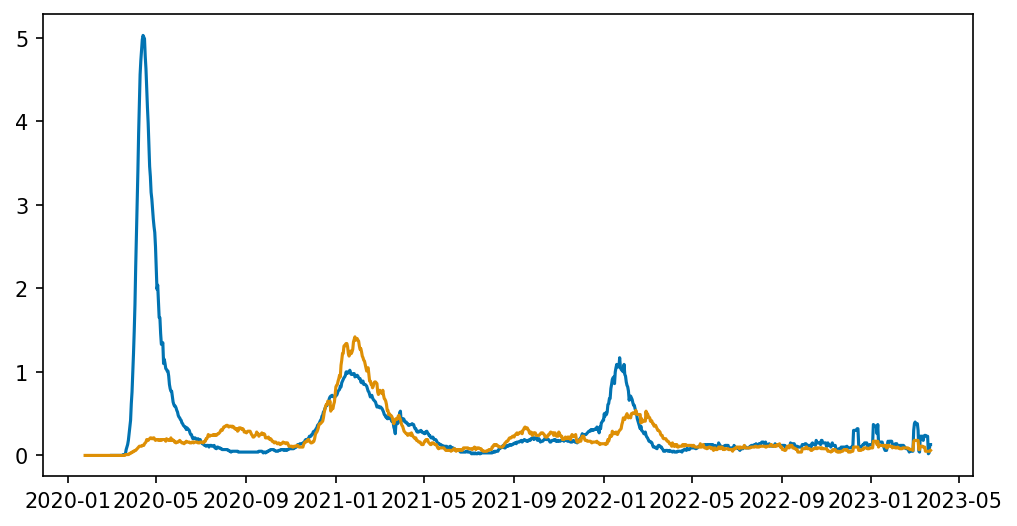

In [ ]:
fig, sub = plt.subplots(1,1, figsize = (8, 4), dpi = 150, sharex=True)
plt.plot(newyork_data['date'], newyork_data['deaths_avg_per_100k'], color = colors[0])
plt.plot(california_data['date'], california_data['deaths_avg_per_100k'], color = colors[1])

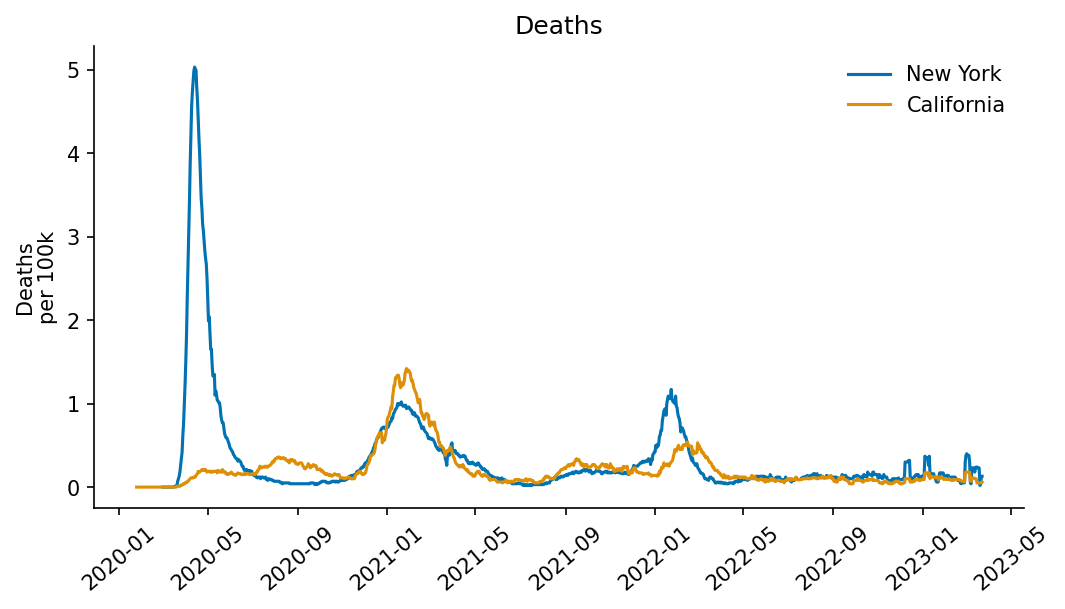

In [ ]:
fig, sub = plt.subplots(1,1, figsize = (8, 4), dpi = 150, sharex=True)
plt.plot(newyork_data['date'], newyork_data['deaths_avg_per_100k'], color = colors[0], label='New York')
plt.plot(california_data['date'], california_data['deaths_avg_per_100k'], color = colors[1], label='California')
sub.set_ylabel('Deaths\nper 100k')
sub.set_title('Deaths')
sub.legend(frameon=False) #optional
plt.xticks(rotation = 40)  #optional
sns.despine() #optional

## 1b) Measuring R at three time intervals in New York and California:
* March 14 - April 1st, 2020
* November 20th - December 20th, 2020
* February 1st - March 1st, 2021

1. Make a new column called `day_index` in the `state_data` dataframe for the day number (an integer) by subtracting the datetime for the start of 2020 and then using .dt.days on the result (see help page for a walkthrough on this part)
2. Make a new column called `log_deaths` in the `state_data` dataframe for log(deaths) by using `np.log` on the deaths_ave column
3. Write a function that:
    * Filters the dataframe based on the state and a time range (start date and end date)
    * Does a linear regression to find the exponential growth rate r (regress your day number column (x) against log deaths (y), r is the slope)
    * Returns an estimate of R, where R is equal to the exponentiation of the exponential growth rate r multiplied by the generation time, which we'll estimate as 5 days.  
$R=e^{5r}$
(`R=np.exp(5*r)`)
4.	Call your function for each of the 3 timeframes in each of the two states
    * Optionally you can also plot log_deaths against day_index in your function in order to graphically see the trends, and see whether these periods have a roughly linear change in log_deaths over time.


In [ ]:
import datetime as dt

state_data['day_index'] = (state_data['date'] - dt.datetime(2020, 1, 1)).dt.days
state_data.head(3)

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0,20
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,21
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,22


In [ ]:
state_data['log_deaths'] = np.log(state_data['deaths_avg'])
state_data.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0,20,-inf
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,21,-inf
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,22,-inf
3,2020-01-24,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,23,-inf
4,2020-01-24,USA-17,Illinois,1,0.14,0.0,0,0.0,0.0,23,-inf


In [ ]:
state_data.tail()

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
61937,2023-03-23,USA-06,California,13691,2432.71,6.16,81,23.29,0.06,1177,3.148024
61938,2023-03-23,USA-05,Arkansas,0,157.57,5.22,0,5.00,0.17,1177,1.609438
61939,2023-03-23,USA-04,Arizona,0,379.43,5.21,0,4.57,0.06,1177,1.519513
61940,2023-03-23,USA-02,Alaska,0,70.57,9.65,0,0.00,0.00,1177,-inf
61941,2023-03-23,USA-01,Alabama,0,280.29,5.72,0,2.71,0.06,1177,0.996949


In [ ]:
#newyork_recent = newyork_data[(newyork_data['date']>dt.datetime(2020, 3, 14)) & (newyork_data['date']<dt.datetime(2020, 4, 01))]
#newyork_data = state_data[["state"] == "New York"]
newyork_data = state_data[state_data['state'] == 'New York']
newyork_recent = newyork_data[(newyork_data['date']>= dt.datetime(2020, 3, 14)) & (newyork_data['date']<= dt.datetime(2020, 4, 1))]
newyork_recent.head()

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
656,2020-03-14,USA-36,New York,189,74.43,0.38,2,0.14,0.00,73,-1.966113
709,2020-03-15,USA-36,New York,122,89.43,0.46,4,0.40,0.00,74,-0.916291
762,2020-03-16,USA-36,New York,218,115.43,0.59,4,0.63,0.00,75,-0.462035
816,2020-03-17,USA-36,New York,425,171.71,0.88,8,1.06,0.01,76,0.058269
870,2020-03-18,USA-36,New York,1012,310.00,1.59,14,1.78,0.01,77,0.576613


LinregressResult(slope=0.41652776180587303, intercept=-31.510968351458057, rvalue=0.9811681502096294, pvalue=1.406465155812687e-13, stderr=0.019887638144091804, intercept_stderr=1.634420261596926)

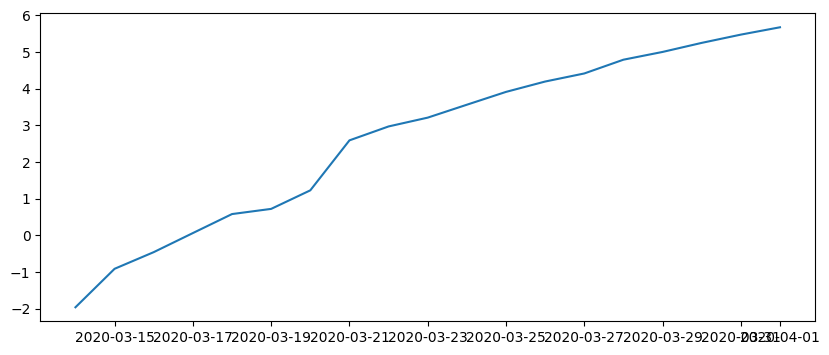

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (10, 4))
sub.plot(newyork_recent['date'], newyork_recent['log_deaths'])

lr = linregress(newyork_recent['day_index'], newyork_recent['log_deaths'])
lr


In [ ]:
r = lr[0]
print(r)
R = np.exp(5*r)
print('The reprodcution number R was', R)

0.41652776180587303
The reprodcution number R was 8.02561907248394


March 14 - April 1st, 2020
November 20th - December 20th, 2020
February 1st - March 1st, 2021

In [ ]:
def get_r_state_data(state, start_date, end_date):
    '''returns the effective reproduction number R over a given time interval in a given country'''
    # filtering our dataset
    # filtering by country
    filtered_by_state =  state_data [ state_data ['state']==state]
    # filtering by date
    filtered_by_d = filtered_by_state[(filtered_by_state['date']>=start_date) & (filtered_by_state['date']<=end_date)]
    lr = linregress(filtered_by_d['day_index'], filtered_by_d['log_deaths'])

    # return R
    return np.exp(lr[0]*5)

get_r_state_data('New York', dt.datetime(2020, 3, 14), dt.datetime(2020, 4, 1))



8.02561907248394

In [ ]:
get_r_state_data('New York', dt.datetime(2020, 11, 20), dt.datetime(2020, 12, 20))

1.2392934214696347

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


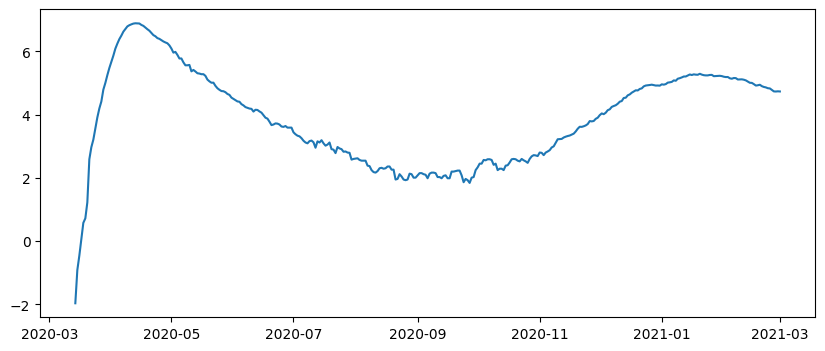

In [ ]:
newyork_recent = newyork_data[(newyork_data['date']>= dt.datetime(2020, 2, 1)) & (newyork_data['date']<= dt.datetime(2021, 3, 1))]
newyork_recent.head()

fig, sub = plt.subplots(1, 1, figsize = (10, 4))
sub.plot(newyork_recent['date'], newyork_recent['log_deaths'])

lr = linregress(newyork_recent['day_index'], newyork_recent['log_deaths'])



In [ ]:
get_r_state_data('New York', dt.datetime(2021, 2, 1), dt.datetime(2021, 3, 1))

0.9125593295798026

In [ ]:
get_r_state_data('California', dt.datetime(2020, 3, 14), dt.datetime(2020, 4, 1))


2.810597802083794

In [ ]:
get_r_state_data('California', dt.datetime(2020, 11, 20), dt.datetime(2020, 12, 20))

1.2930863356846372

In [ ]:
get_r_state_data('California', dt.datetime(2021, 2, 1), dt.datetime(2021, 3, 1))

0.9009879243869238

How was the effective reproduction number R different at the 3 different time intervals in CA and NY? What do you think caused these differences?

Add your text here:

The R number is quite different int the begining of the year in 2020 in these two places, but it became similar towards the end of 2020, so it seems like the vaccine play some important role, so it makes the two places death rate similar

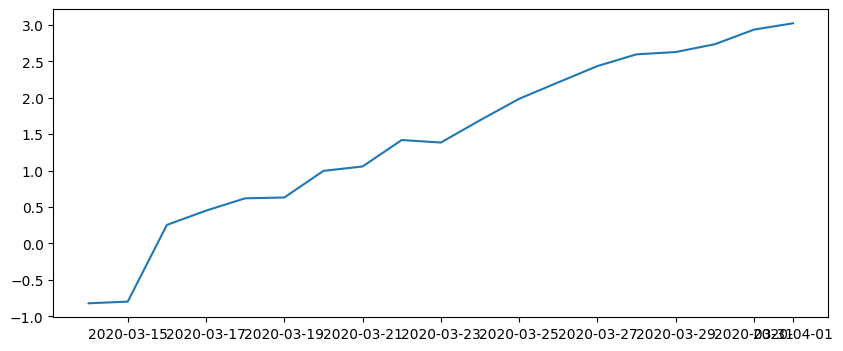

In [ ]:
cali_data = state_data[state_data['state'] == 'California']
cali_recent = cali_data[(cali_data['date']>= dt.datetime(2020, 3, 14)) & (cali_data['date']<= dt.datetime(2020, 4, 1))]
cali_recent.head()

fig, sub = plt.subplots(1, 1, figsize = (10, 4))
sub.plot(cali_recent['date'], cali_recent['log_deaths'])

lr = linregress(cali_recent['day_index'], cali_recent['log_deaths'])

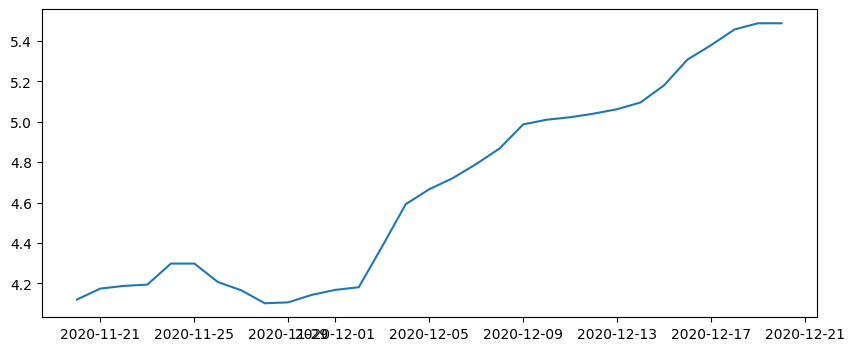

In [ ]:
cali_data = state_data[state_data['state'] == 'California']
cali_recent = cali_data[(cali_data['date']>= dt.datetime(2020, 11, 20)) & (cali_data['date']<= dt.datetime(2020, 12, 20))]
cali_recent.head()

fig, sub = plt.subplots(1, 1, figsize = (10, 4))
sub.plot(cali_recent['date'], cali_recent['log_deaths'])

lr = linregress(cali_recent['day_index'], cali_recent['log_deaths'])
plt.show()

## 1c) Telling the story of coronavirus in your county
Make a plot like the one at the top of these instruction document, but for your county instead of the whole country
* take a look at the county data by running `county_data.head(3)`
* Make a subset of that dataframe that is only data for California
* Make a subset of that dataframe that is only data for your county
* Make a figure with 3 subplots using this line of code: `fig, subs = plt.subplots(3, 1, figsize=(8, 4), dpi=150, sharex=True)`
* Plot cases_avg and deaths_avg (these are rolling averages) over time on two subplots of the figure
* Use “sharex=True” when making your subplots to make the x-axis the same between plots
* Using the `county_vax` data from the LA Times:
    * Make a subset of that dataframe that is only data for your county
    * Plot fully_vaccinated_percent over time on a third subplot of your figure
    * Label your axes where appropriate


In [ ]:
county_data.head(3)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0


In [ ]:
cali_data = county_data[county_data['state'] == 'California']
cali_death = cali_data[cali_data["deaths_avg"] > 100]
cali_death.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
16127,2021-01-05,USA-06037,Los Angeles,California,13113,13510.71,134.58,221,105.40,1.05
19395,2021-01-06,USA-06037,Los Angeles,California,11554,13728.29,136.75,257,113.07,1.13
22663,2021-01-07,USA-06037,Los Angeles,California,19239,14404.86,143.49,217,118.17,1.18
25931,2021-01-08,USA-06037,Los Angeles,California,18038,14127.43,140.72,318,126.27,1.26
29199,2021-01-09,USA-06037,Los Angeles,California,16767,14290.14,142.34,221,131.17,1.31


In [ ]:
cali_alameda_data = county_data[(county_data['state'] == 'California') & (county_data['county'] == "Alameda")]
cali_alameda_data.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
423,2020-03-01,USA-06001,Alameda,California,1,0.14,0.01,0,0.0,0.0
456,2020-03-02,USA-06001,Alameda,California,0,0.14,0.01,0,0.0,0.0
491,2020-03-03,USA-06001,Alameda,California,1,0.29,0.02,0,0.0,0.0
530,2020-03-04,USA-06001,Alameda,California,0,0.29,0.02,0,0.0,0.0
579,2020-03-05,USA-06001,Alameda,California,0,0.29,0.02,0,0.0,0.0


In [ ]:

cali_alameda_vex_data = county_vax[(county_vax['county'] == "Alameda")]
cali_alameda_vex_data.head()
cali_alameda_vex_full_data = cali_alameda_vex_data["fully_vaccinated_percent"]
cali_alameda_vex_full_data.head()
county_vax.info

<bound method DataFrame.info of             date     county  fips  population  doses_administered  \
0     2023-06-03    Alameda     1   1643700.0             4614997   
1     2023-06-03     Alpine     2      1148.0                1883   
2     2023-06-03     Amador     5     37829.0               68869   
3     2023-06-03      Butte     7    227075.0              352477   
4     2023-06-03  Calaveras     9     45235.0               77167   
...          ...        ...   ...         ...                 ...   
72263 2020-01-05     Tulare   107    460477.0                   0   
72264 2020-01-05   Tuolumne   109     53932.0                   0   
72265 2020-01-05    Ventura   111    848112.0                   0   
72266 2020-01-05       Yolo   113    214977.0                   0   
72267 2020-01-05       Yuba   115     75493.0                   0   

       new_doses_administered  pfizer_doses  new_pfizer_doses  moderna_doses  \
0                         151     3032626.0                

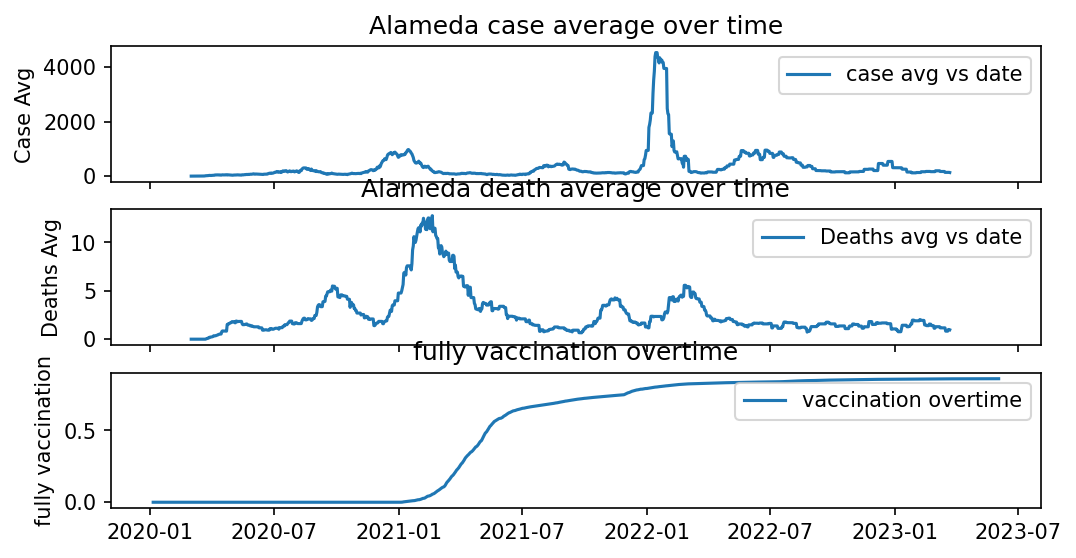

In [ ]:
fig, subs = plt.subplots(3, 1, figsize=(8, 4), dpi=150, sharex=True)

subs[0].plot(cali_alameda_data['date'], cali_alameda_data['cases_avg'])
subs[0].set_title('Alameda case average over time')                    # Title for Subplot 1
subs[0].set_ylabel('Case Avg')                  # Y-axis label for Subplot 1
subs[0].legend(['case avg vs date'])               # Legend for Subplot 1
#subs[0].set_xlim(0, 1000)

subs[1].plot(cali_alameda_data['date'], cali_alameda_data['deaths_avg'])
subs[1].set_title('Alameda death average over time')                    # Title for Subplot 1
subs[1].set_ylabel('Deaths Avg')                  # Y-axis label for Subplot 1
subs[1].legend(['Deaths avg vs date'])               # Legend for Subplot 1
#subs[1].set_xlim(0, 50000)


subs[2].plot(cali_alameda_vex_data['date'], cali_alameda_vex_data['fully_vaccinated_percent'])
subs[2].set_title('fully vaccination overtime')                    # Title for Subplot 1
subs[2].set_ylabel('fully vaccination')                  # Y-axis label for Subplot 1
subs[2].legend(['vaccination overtime'])               # Legend for Subplot 1
#subs[2].set_xlim(2019, 2023)

plt.show()

In a few sentences, write about the story the data tells about the past couple of years specifically for your county.

Add text here:

it seems like the vaccciation rate increase and the death rate decreased, as people are getting vaccinated, people may still get infected by COVID again, but the death rate became low as a result of vaccination

##**Part 2**

## 2) Part 2: Exploring the data more!
You may choose what to explore about the data in part 2. At some point during this process, make sure you are **asking a question** and trying to answer it with the data. Can you find out something interesting? Here are some suggestions:
#### Relatively easy ideas:
* Make a similar county plot as you made in 1C, but include another 2-3 counties near your county so you can compare and contrast the dynamics of cases, deaths, and vaccinations. Since you are comparing counties with different population sizes on the same plot, you should use cases_avg_per_100k and deaths_avg_per_100k instead of just cases_avg and deaths_avg, in order to control for those population size differences.
* Measure R at a few time intervals for your county. Compare and contrast your results with your results for New York and California above. Make sure to check that your data for the time intervals isn’t too noisy – it’s possible for little fluctuations to affect the slope of log_deaths vs. time if the counts are low.
* Do some research to add some human aspect to the story of Covid-19 in your county, and annotate your plot (either in pyplot or on another image editing program). One example of an annotation you could add is when lockdowns or mask mandates began or ended, but you could also mark more specific events, like specific people who are important to the community or to you getting sick or vaccinated.
#### More difficult ideas:
* Look at the the relationship between politics (voting results from the 2020 election), vaccination rates, and covid deaths since the start of the summer. You can ask this question specifically at the county level in California, using the `county_vax` dataframe, the `county_data` dataframe, and the county voting data available here: `'https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv'`. This will likely require you to:
    * Filter the `county_vax` dataframe to just get data from a single date (one row per county)
    * Filter the `county_data` dataframe to get dates starting around June 2021, and then use `.groupby` and `.sum` to get the total number of deaths and cases per 100k in that time frame for each county
    * Manipulate the FIPS or county_name columns in each of the 3 datasets to be able to merge them
* Pick a country whose data you would like to explore, or ask a question about why some countries have done better than others (see the Our World in Data dataset below). Keep in mind that different countries have different standards for reporting cases and deaths, so the data quality may be variable.
* Look into the variant data from the LA Times dataset and see if you can measure differences in R between variants in certain time intervals when multiple variants were present in California
* Look into the prison data in either the LA Times or NY Times datasets - how did Covid-19 affect prison populations as compared to the general public?
* Look at the mask use survey data from the NY Times from the summer of 2020. Does these mask use survey results correlate with voting patterns in US counties? With vaccination rates? With Covid cases or deaths? Similar to the question above, this will likely require some data manipulation and merging

* Or you can come up with your own idea!

Dataset links:

* [LA Times covid data](https://github.com/datadesk/california-coronavirus-data)
* [New York Times covid data](https://github.com/nytimes/covid-19-data)
* [Our world in data (covid data)](https://github.com/owid/covid-19-data)
* [Our world in data (general worldwide datasets)](https://github.com/owid/owid-datasets/tree/master/datasets)
* [Datasets from dataopian](https://github.com/datasets)

In [ ]:
# county_voting = pd.read_csv('https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv')
# county_voting.head(3)

In [ ]:
# county_data.head()
# # Convert 'date' column to datetime type (if not already done)
# county_data['date'] = pd.to_datetime(county_data['date'])

# # Filter data for dates starting around June 2021
# start_date = pd.to_datetime('2021-06-01')

# county_data_filterdate = county_data[county_data['date'] >= start_date]
# county_data_filterdate.head()
# county_data_death = county_data_filterdate.groupby("county").sum()

# print(county_data_death)

Clearly introduce your question and your hypothesis. Explain what data you are using to explore this question.

The question will be investigation if the vaccination can help reduce the death rate in three time frame

In [ ]:
# the tiem frame will be March 14 - April 1st, 2020 November 20th - December 20th, 2020 February 1st - March 1st, 2021

county_data['day_index'] = (county_data['date'] - dt.datetime(2020, 1, 1)).dt.days
#county_data['log_deaths'] = np.log(county_data['deaths_avg_per_100k'])

cali_SF_data = county_data[(county_data['state'] == 'California') & (county_data['county'] == "San Francisco")]
cali_SF_vex_data = county_vax[(county_vax['county'] == "San Francisco")]
cali_SF_data.head()

cali_SM_data = county_data[(county_data['state'] == 'California') & (county_data['county'] == "San Mateo")]
cali_SM_vex_data = county_vax[(county_vax['county'] == "San Mateo")]
cali_SM_data.head()


# cali_SM_vex_data_full = cali_SM_vex_data[["fully_vaccinated_percent", "county"]]
# cali_SM_vex_data_full


cali_NY_data = county_data[(county_data['state'] == 'New York') & (county_data['county'] == "New York City")]
#cali_NY_vex_data = county_vax[(county_vax['county'] == "Queens")]

#cali_NY_vex_data = state_vax[state_vax['location'].str.contains("New")]
NY_vex_data = state_vax[state_vax['location'] == "New York State"]

Cali_vex_data = state_vax[state_vax['location'] == "California"]
Cali_vex_data


,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
5094,2021-01-12,California,816301.0,3286050.0,703540.0,0.25,2.07,100089.0,1.78,8.32,NaN,NaN,NaN,0.248,NaN,NaN
5095,2021-01-13,California,891489.0,3435650.0,744545.0,0.34,2.26,133689.0,1.88,8.70,75188.0,75188.0,1903.0,0.259,NaN,NaN
5096,2021-01-14,California,975293.0,3540175.0,801998.0,NaN,2.47,NaN,2.03,8.96,83804.0,79496.0,2012.0,0.275,NaN,NaN
5097,2021-01-15,California,1072959.0,3548575.0,865387.0,0.52,2.72,204374.0,2.19,8.98,97666.0,85553.0,2165.0,0.302,NaN,NaN
5098,2021-01-16,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88381.0,2237.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,2023-05-06,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13153.0,333.0,NaN,NaN,NaN
5939,2023-05-07,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14187.0,359.0,NaN,NaN,NaN
5940,2023-05-08,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15221.0,385.0,NaN,NaN,NaN
5941,2023-05-09,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16256.0,411.0,NaN,NaN,NaN


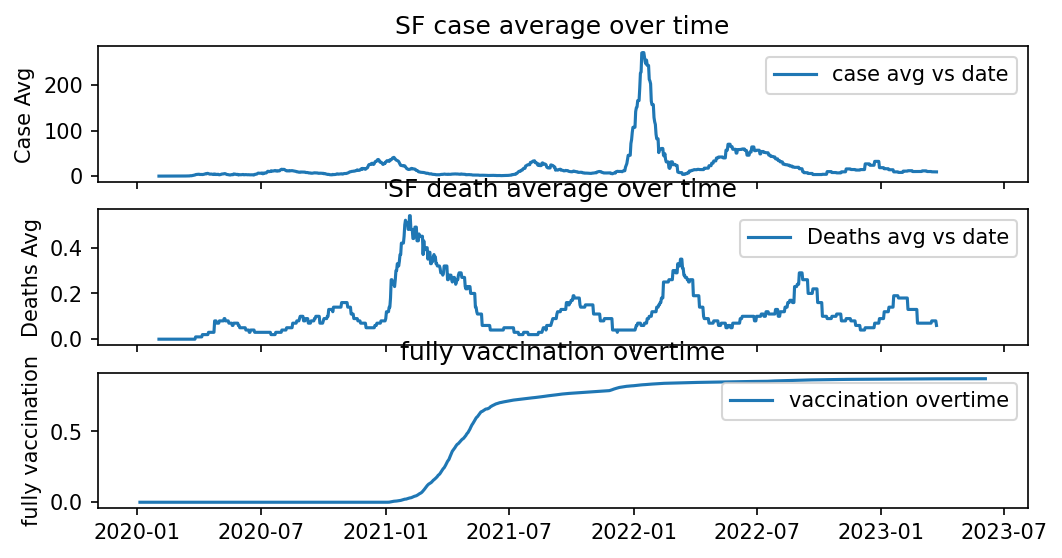

In [ ]:
fig, subs = plt.subplots(3, 1, figsize=(8, 4), dpi=150, sharex=True)

subs[0].plot(cali_SF_data['date'], cali_SF_data['cases_avg_per_100k'])
subs[0].set_title('SF case average over time')                    # Title for Subplot 1
subs[0].set_ylabel('Case Avg')                  # Y-axis label for Subplot 1
subs[0].legend(['case avg vs date'])               # Legend for Subplot 1
#subs[0].set_xlim(0, 1000)

subs[1].plot(cali_SF_data['date'], cali_SF_data['deaths_avg_per_100k'])
subs[1].set_title('SF death average over time')                    # Title for Subplot 1
subs[1].set_ylabel('Deaths Avg')                  # Y-axis label for Subplot 1
subs[1].legend(['Deaths avg vs date'])               # Legend for Subplot 1
#subs[1].set_xlim(0, 50000)


subs[2].plot(cali_SF_vex_data['date'], cali_SF_vex_data['fully_vaccinated_percent'])
subs[2].set_title('fully vaccination overtime')                    # Title for Subplot 1
subs[2].set_ylabel('fully vaccination')                  # Y-axis label for Subplot 1
subs[2].legend(['vaccination overtime'])               # Legend for Subplot 1
#subs[2].set_xlim(2019, 2023)

plt.show()

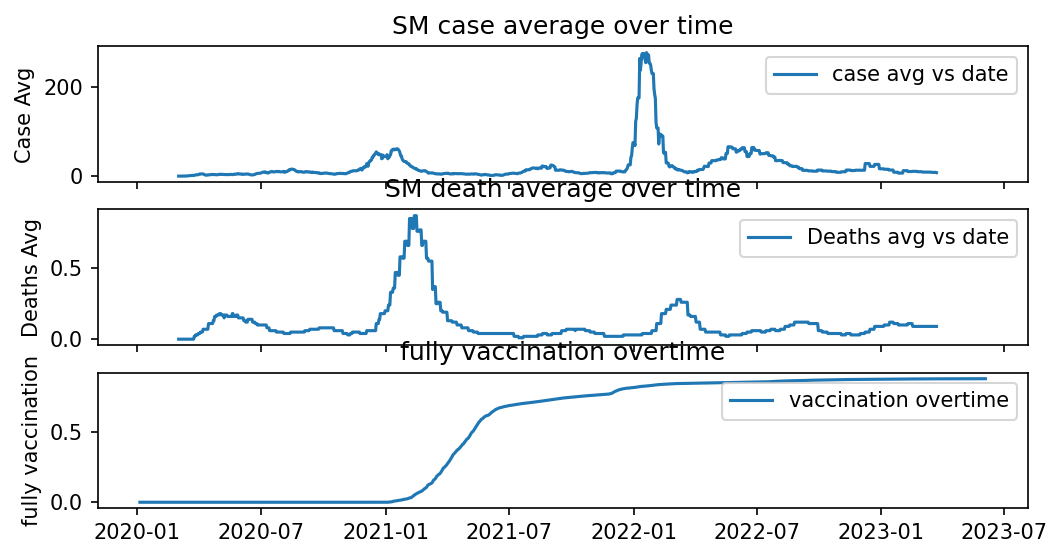

In [ ]:
fig, subs = plt.subplots(3, 1, figsize=(8, 4), dpi=150, sharex=True)

subs[0].plot(cali_SM_data['date'], cali_SM_data['cases_avg_per_100k'])
subs[0].set_title('SM case average over time')                    # Title for Subplot 1
subs[0].set_ylabel('Case Avg')                  # Y-axis label for Subplot 1
subs[0].legend(['case avg vs date'])               # Legend for Subplot 1
#subs[0].set_xlim(0, 1000)

subs[1].plot(cali_SM_data['date'], cali_SM_data['deaths_avg_per_100k'])
subs[1].set_title('SM death average over time')                    # Title for Subplot 1
subs[1].set_ylabel('Deaths Avg')                  # Y-axis label for Subplot 1
subs[1].legend(['Deaths avg vs date'])               # Legend for Subplot 1
#subs[1].set_xlim(0, 50000)


subs[2].plot(cali_SM_vex_data['date'], cali_SM_vex_data['fully_vaccinated_percent'])
subs[2].set_title('fully vaccination overtime')                    # Title for Subplot 1
subs[2].set_ylabel('fully vaccination')                  # Y-axis label for Subplot 1
subs[2].legend(['vaccination overtime'])               # Legend for Subplot 1
#subs[2].set_xlim(2019, 2023)

plt.show()

Add your text here:


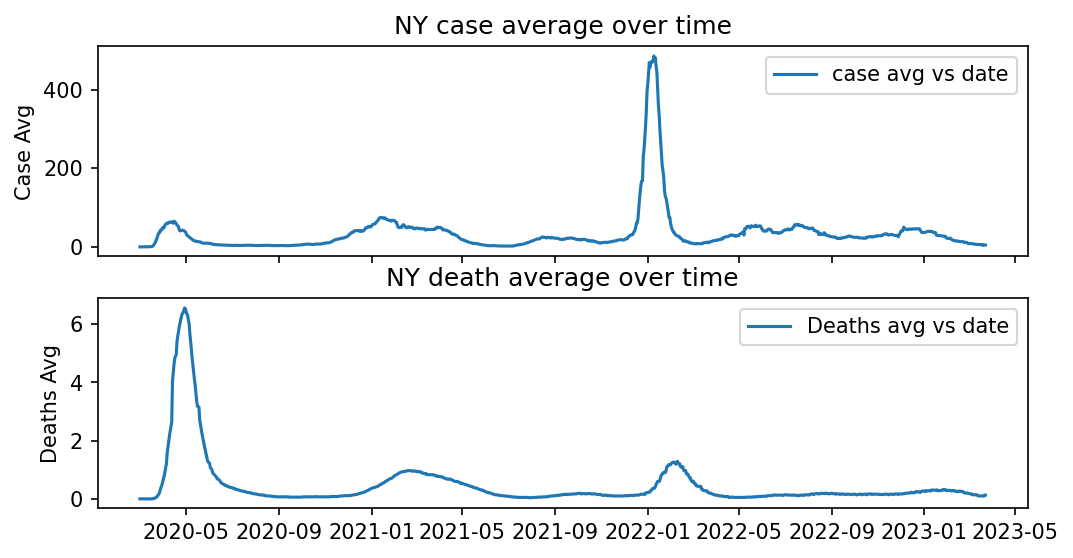

In [ ]:
fig, subs = plt.subplots(2, 1, figsize=(8, 4), dpi=150, sharex=True)

subs[0].plot(cali_NY_data['date'], cali_NY_data['cases_avg_per_100k'])
subs[0].set_title('NY case average over time')                    # Title for Subplot 1
subs[0].set_ylabel('Case Avg')                  # Y-axis label for Subplot 1
subs[0].legend(['case avg vs date'])               # Legend for Subplot 1
#subs[0].set_xlim(0, 1000)

subs[1].plot(cali_NY_data['date'], cali_NY_data['deaths_avg_per_100k'])
subs[1].set_title('NY death average over time')                    # Title for Subplot 1
subs[1].set_ylabel('Deaths Avg')                  # Y-axis label for Subplot 1
subs[1].legend(['Deaths avg vs date'])               # Legend for Subplot 1
#subs[1].set_xlim(0, 50000)


plt.show()

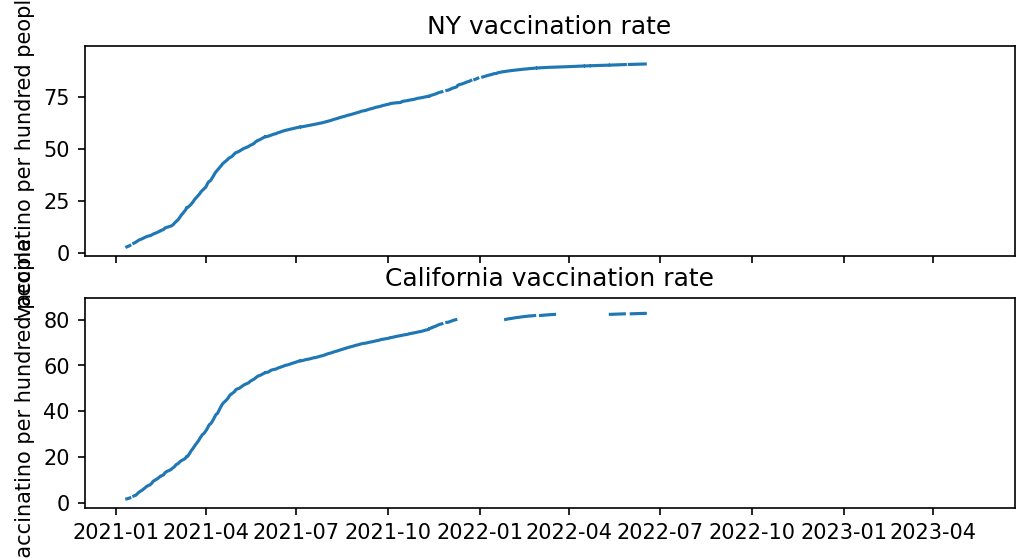

In [ ]:
fig, subs = plt.subplots(2, 1, figsize=(8, 4), dpi=150, sharex=True)

subs[0].plot(NY_vex_data['date'], NY_vex_data['people_vaccinated_per_hundred'])
subs[0].set_title('NY vaccination rate')                    # Title for Subplot 1
subs[0].set_ylabel('vaccinatino per hundred people')                  # Y-axis label for Subplot 1
##subs[0].legend(['case avg vs date'])               # Legend for Subplot 1
#subs[0].set_xlim(0, 1000)

subs[1].plot(Cali_vex_data['date'], Cali_vex_data['people_vaccinated_per_hundred'])
subs[1].set_title('California vaccination rate')                    # Title for Subplot 1
subs[1].set_ylabel("vaccinatino per hundred people")                  # Y-axis label for Subplot 1
#subs[1].legend(['Deaths avg vs date'])               # Legend for Subplot 1
#subs[1].set_xlim(0, 50000)


plt.show()

In [ ]:
def get_r_vaccine_data(state, county, start_date, end_date):
    '''returns the effective reproduction number R over a given time interval in a given country'''
    # filtering our dataset
    # filtering by country
    filtered_by_state =  county_data [ (county_data ['state']==state) & (county_data ['county']==county)]
    # filtering by date
    filtered_by_d = filtered_by_state[(filtered_by_state['date']>=start_date) & (filtered_by_state['date']<=end_date)]
    lr = linregress(filtered_by_d['day_index'], filtered_by_d['deaths_avg_per_100k'])

    # return R
    return np.exp(lr[0]*5)


## the tiem frame will be March 14 - April 1st, 2020 November 20th - December 20th, 2020 February 1st - March 1st, 2021
get_r_vaccine_data('California', "San Francisco", dt.datetime(2020, 3, 14), dt.datetime(2020, 4, 1))


1.00342691111095

In [ ]:
get_r_vaccine_data('California', "San Francisco", dt.datetime(2020, 11, 20), dt.datetime(2020, 12, 20))

0.9955743383601351

In [ ]:
get_r_vaccine_data('California', "San Francisco", dt.datetime(2021, 2, 1), dt.datetime(2021, 3, 1))

0.9808507463656193

In [ ]:
get_r_vaccine_data('California', "San Mateo", dt.datetime(2020, 3, 14), dt.datetime(2020, 4, 1))

1.0127116943131957

In [ ]:
get_r_vaccine_data('California', "San Mateo", dt.datetime(2020, 11, 20), dt.datetime(2020, 12, 20))

1.007975182073349

In [ ]:
get_r_vaccine_data('California', "San Mateo", dt.datetime(2021, 2, 1), dt.datetime(2021, 3, 1))

0.9873710632367337

Include at least one figure that shows data relevant to the question.

Briefly explain your results
  * You may not have been able to answer your question with the data - that is OK
  * Briefly explain what the data says about your question.
  * Remember, correlation does not equal causation, but together with other data / information, we can say what the data "suggests" at least! Rule of thumb: be honest, ask yourself what do you think is happening in the data, and report any statistical test results openly.

Add your text here:

I was trying to find the relationship between california and new york, by compare some counties infomation, but I couldn't find the new york county information, so I used the state vax information instead.
apparently, in three california counties above, the vaccination rate, case average, and death average distrubution are very similar, which indicate the policy in the bay area is the same, and people in the bay area follows the vaccination procedure are similar as well. People death rate is inversely related to the vaccination rate. Even the death rate distribution is different from New york vs California, but the vaccination rate distribution is the same. But from the above data, I can't answer why there is a difference in death rate.

In [ ]:
# Your code for Part 2: